<a href="https://colab.research.google.com/github/brainopensource/datascience-mvp/blob/ml-analytics-mvp/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas para conclusão da Sprint da Pós-Graduação em Ciência de Dados e Analytics (PUC Rio)

# Aluno Lucas da S. Rocha

## Introdução

Este notebook apresenta o desenvolvimento de um Mínimo Produto Viável (MVP) como parte do primeiro módulo da Pós-Graduação em Ciência de Dados e Analytics da PUC-Rio. Utilizando dados abertos recentes sobre a produção de petróleo e gás no Brasil, disponibilizados pela Agência Nacional de Petróleo (ANP), o objetivo deste projeto é aplicar técnicas de ciência de dados para explorar, processar e gerar insights iniciais, abrindo caminho para futuras análises de maior valor.

A proposta central é explorar os dados de produção de petróleo e gás na região do pré-sal a partir de 2020, com foco em estatísticas descritivas, pré-processamento, e visualizações que destaquem as dinâmicas produtivas. O escopo inicial inclui operações de limpeza e organização dos dados, bem como a construção de insights preliminares sobre o setor de upstream, abordando a produção por poço e suas características específicas.

Este MVP não só contribui para uma maior compreensão da indústria de petróleo e gás no Brasil nos últimos cinco anos, como também estabelece uma base sólida para análises preditivas e avanços no uso de técnicas de machine learning em projetos futuros. Assim, o projeto serve tanto a propósitos acadêmicos quanto práticos, fornecendo uma visão inicial sobre a produção de petróleo no pré-sal e potencializando aplicações futuras.

## Definição do Problema

O petróleo continua sendo um ativo estratégico no cenário energético global, afetado por fatores geopolíticos e pela volatilidade dos mercados internacionais. Nesse cenário, o Brasil se destaca como um dos principais produtores mundiais de petróleo e gás natural, tornando sua produção um tema relevante para análises e tomadas de decisão.

O objetivo deste trabalho é investigar a produção de petróleo e gás natural por poço, utilizando dados que abrangem o período de janeiro de 2020 até o primeiro semestre de 2024. Esse recorte captura as tendências mais recentes da indústria e nos permite explorar os fatores que influenciam a produtividade e a eficiência. A partir da aplicação de técnicas de ciência de dados, buscamos identificar padrões produtivos, anomalias e insights que possam otimizar a alocação de recursos e aumentar a eficiência e previsibilidade operacional e financeira.

A riqueza dos dados por poço oferece oportunidades significativas para análises detalhadas. Através de métodos estatísticos e, futuramente, de algoritmos de aprendizado de máquina, pretendemos explorar diversas aplicações, incluindo:    Análise de Eficiência da Produção, Geração de Curvas de Decaimento de Poços,    Classificação de Poços por Eficiência, Previsão da Produção Total por Campo e   Previsão de Royalties.

Essas análises iniciais geram insights valiosos para a gestão e a operação de poços e campos. O pré-processamento dos dados e a análise exploratória formam a base necessária para futuras implementações de machine learning, facilitando o desenvolvimento de modelos preditivos robustos e a criação de ferramentas analíticas que forneçam uma visão mais profunda das dinâmicas de produção. Isso permitirá, no futuro, decisões mais assertivas e embasadas no contexto da produção de petróleo e gás natural no Brasil, à medida que utilizaremos técnicas de aprendizado supervisionado em nosso estudo.


## Código do MVP

### Importação de Bibliotecas

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import hashlib
import warnings
import missingno as msno

### Funções auxiliares

  Funções que serão úteis posteriormente no nosso MVP

In [9]:
# Função para gerar indice unico com hash
def hash_column(row, col1, col2, col3):
    """
    Gera um hash MD5 único para uma linha do DataFrame, combinando os valores
    de duas colunas especificadas.

    Args:
        row (pd.Series): A linha do DataFrame que contém os dados.
        col1 (str): O nome da primeira coluna a ser combinada.
        col2 (str): O nome da segunda coluna a ser combinada.

    Returns:
        str: Um hash MD5 gerado a partir dos valores combinados das duas colunas.
    """
    return hashlib.md5(f"{row[col1]}_{row[col2]}_{row[col3]}".encode()).hexdigest()

### Configuração do Ambiente

Configurações estéticas do pandas para limitar o máximo de linhas, colunas e filtrar avisos.

In [10]:
# Definindo o limite de exibição colunas de dataframe para None (sem limite)
pd.set_option('display.max_columns', 48)

# Definindo o limite de exibição de linhas de dataframe para 48
pd.set_option('display.max_rows', 48)

# Filter warnings
warnings.filterwarnings('ignore')

### Criando lista de URLs de datasets

Conforme sugerido, os dados foram disponibilizados publicamente no repositório do Github e lidos no formato Raw

[Link do Repositório](https://github.com/brainopensource/datascience-mvp)


In [ ]:
"""# Criando lista de anos e meses
anos = [year for year in range(2015,2025)]
print(anos)
meses = [str(i).zfill(2) for i in range(1, 13)]

# Criando uma lista 1D com todas as URLs
urls = []

# Iterando no repositório criado para criar a lista
for ano in anos:
    if ano == 2024:
        meses_ano = meses[:6]  # Apenas os primeiros 6 meses de 2024
    else:
        meses_ano = meses  # Todos os meses para os outros anos

    for mes in meses_ano:
        url = f'https://raw.githubusercontent.com/brainopensource/datascience-mvp/refs/heads/main/datasets/monthly_production/{ano}/{ano}_{mes}_producao_PreSal.csv'
        urls.append(url)"""

[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


In [4]:
# Criando lista de anos e meses
anos_mar = [year for year in range(1980, 2025)]  # Para 'mar', todos os anos de 1980 a 2024
anos_pre_sal = [year for year in range(2011, 2025)]  # Para 'pre sal', de 2011 a 2024
meses = [str(i).zfill(2) for i in range(1, 13)]  # Meses de 01 a 12

# Criando listas 1D para URLs de 'mar' e 'pre sal'
urls_mar = []
urls_pre_sal = []

# Iterando para criar as listas de URLs para 'mar' e 'pre sal'
for ano in anos_mar:
    if ano == 2024:
        meses_ano = meses[:6]  # Apenas os primeiros 6 meses de 2024
    else:
        meses_ano = meses  # Todos os meses para os outros anos

    # URL para o arquivo 'Mar' (desde 1980 até 2024)
    for mes in meses_ano:
        url_mar = f'https://raw.githubusercontent.com/brainopensource/datascience-mvp/refs/heads/main/datasets/monthly_production/{ano}/{ano}_{mes}_producao_Mar.csv'
        urls_mar.append(url_mar)

# Para o 'pre sal', somente a partir de 2011
for ano in anos_pre_sal:
    if ano == 2024:
        meses_ano = meses[:6]  # Apenas os primeiros 6 meses de 2024
    else:
        meses_ano = meses  # Todos os meses para os outros anos

    for mes in meses_ano:
        # URL para o arquivo 'PreSal' (apenas de 2011 até 2024)
        url_pre_sal = f'https://raw.githubusercontent.com/brainopensource/datascience-mvp/refs/heads/main/datasets/monthly_production/{ano}/{ano}_{mes}_producao_PreSal.csv'
        urls_pre_sal.append(url_pre_sal)

# Carregando os arquivos 'PreSal' e 'Mar' nos respectivos DataFrames com encoding='latin-1'
df_pre_sal = pd.concat([pd.read_csv(url, sep=';', encoding='latin-1') for url in urls_pre_sal], ignore_index=True)
df_mar = pd.concat([pd.read_csv(url, sep=';', encoding='latin-1') for url in urls_mar], ignore_index=True)


# Exibindo os primeiros registros para verificar
print("PreSal DataFrame:")
print(df_pre_sal.head())  # Exemplo para visualizar os primeiros registros do df_pre_sal

print("\nMar DataFrame:")
print(df_mar.head())  # Exemplo para visualizar os primeiros registros do df_mar


PreSal DataFrame:
           Estado   Bacia   Nome Poço ANP Nome Poço Operador      Campo  \
0  Rio de Janeiro  Campos   3-RJS-159-RJS      3RJS 0159  RJ      PAMPO   
1  Rio de Janeiro  Campos    7-PM-17D-RJS     7PM  0017D RJS      PAMPO   
2  Rio de Janeiro  Campos  6-BRSA-806-RJS          6CRT43RJS  CARATINGA   
3  Rio de Janeiro  Campos  4-RJS-265A-RJS      4RJS 0265A RJ     TRILHA   
4       São Paulo  Santos  1-BRSA-594-SPS             1SPS55   SAPINHOÁ   

         Operador Número do Contrato  Período Óleo (bbl/dia)  \
0  Trident Energy    480000037079755  2011/01            293   
1  Trident Energy    480000037079755  2011/01       196,6633   
2       Petrobras    480000038989755  2011/01     13362,6445   
3  Trident Energy    480000037089718  2011/01       241,7799   
4       Petrobras    486100038842000  2011/01     17756,2351   

   Condensado (bbl/dia)  ... % em Volumes Nonanos % em Volumes Decanos  \
0                     0  ...                  NaN                  NaN  

In [11]:
# Exibindo os primeiros registros para verificar
print("PreSal DataFrame:")
display(df_pre_sal.head(2))  # Exemplo para visualizar os primeiros registros do df_pre_sal

print("\nMar DataFrame:")
display(df_mar.head(2))  # Exemplo para visualizar os primeiros registros do df_mar

PreSal DataFrame:


,Estado,Bacia,Nome Poço ANP,Nome Poço Operador,Campo,Operador,Número do Contrato,Período,Óleo (bbl/dia),Condensado (bbl/dia),Petróleo (bbl/dia),Gás Natural (Mm³/dia) Assoc,Gás Natural (Mm³/dia) N Assoc,Gás Natural (Mm³/dia) Total,Volume Gás Royalties (m³/mês),Água (bbl/dia),Instalação Destino,Tipo Instalação,Tempo de Produção (hs por mês),Período da Carga,Corrente,Grau API,Fração de Destilados|Lev|Cort,Fração de Destilados|Lev|Vol,Fração de Destilados|Méd|Corte,Fração de Destilados|Méd|Vol,Fração de Destilados|Pes|Corte,Fração de Destilados|Pes|Vol,% em Volumes Metano,% em Volumes Etano,% em Volumes Propano,% em Volumes Iso-Butano,% em Volumes Butano,% em Volumes Iso-Pentano,% em Volumes n-Pentano,% em Volumes Hexanos,% em Volumes Heptanos,% em Volumes Octanos,% em Volumes Nonanos,% em Volumes Decanos,% em Volumes Undecanos,% em Volumes Oxigênio,% em Volumes Nitrogênio,% em Volumes Gás Carbônico,Densidade GLP Gás,Densidade GLP Líquido,PCS GP(kJ/m³),Data de atualização
0,Rio de Janeiro,Campos,3-RJS-159-RJS,3RJS 0159 RJ,PAMPO,Trident Energy,480000037079755,2011/01,293,0,293,"8,1454",0,"8,1454","250,19692","125,5683",PLATAFORMA DE PAMPO-1,UEP,0,NaN,NaN,NaN,< ºC,%,NaN,%,> ºC,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14/11/2024
1,Rio de Janeiro,Campos,7-PM-17D-RJS,7PM 0017D RJS,PAMPO,Trident Energy,480000037079755,2011/01,"196,6633",0,"196,6633","3,0835",0,"3,0835","94,71385","12,55",PLATAFORMA DE PAMPO-1,UEP,0,NaN,NaN,NaN,< ºC,%,NaN,%,> ºC,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14/11/2024



Mar DataFrame:


,Estado,Bacia,Nome Poço ANP,Nome Poço Operador,Campo,Operador,Número do Contrato,Período,Óleo (bbl/dia),Condensado (bbl/dia),Petróleo (bbl/dia),Gás Natural (Mm³/dia) Assoc,Gás Natural (Mm³/dia) N Assoc,Gás Natural (Mm³/dia) Total,Volume Gás Royalties (m³/mês),Água (bbl/dia),Instalação Destino,Tipo Instalação,Tempo de Produção (hs por mês),Período da Carga,Corrente,Grau API,Fração de Destilados|Lev|Cort,Fração de Destilados|Lev|Vol,Fração de Destilados|Méd|Corte,Fração de Destilados|Méd|Vol,Fração de Destilados|Pes|Corte,Fração de Destilados|Pes|Vol,% em Volumes Metano,% em Volumes Etano,% em Volumes Propano,% em Volumes Iso-Butano,% em Volumes Butano,% em Volumes Iso-Pentano,% em Volumes n-Pentano,% em Volumes Hexanos,% em Volumes Heptanos,% em Volumes Octanos,% em Volumes Nonanos,% em Volumes Decanos,% em Volumes Undecanos,% em Volumes Oxigênio,% em Volumes Nitrogênio,% em Volumes Gás Carbônico,Densidade GLP Gás,Densidade GLP Líquido,PCS GP(kJ/m³),Data de atualização
0,Sergipe,Sergipe,7-GA-15-SES,7GA 0015 SES,GUARICEMA,Petrobras,480000038399796,1980/01,"433,1041",0,"433,1041","17,1308",0,"17,1308",0,"1,0956",NaN,NaN,0,NaN,NaN,NaN,< ºC,%,NaN,%,> ºC,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14/11/2024
1,Sergipe,Sergipe,7-GA-18D-SES,7GA 0018D SES,GUARICEMA,Petrobras,480000038399796,1980/01,"300,0239",0,"300,0239","3,7661",0,"3,7661",0,",629",NaN,NaN,0,NaN,NaN,NaN,< ºC,%,NaN,%,> ºC,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14/11/2024


In [16]:
# Assumindo que df_pre_sal e df_mar já foram carregados corretamente

# Comparando as colunas
colunas_pre_sal = df_pre_sal.columns
colunas_mar = df_mar.columns

# Variáveis para rastrear erros
erro_nome_coluna = False
erro_tipo_dado = False

# Verificando se as colunas estão faltando ou são extras
print("Verificando nomes das colunas...")
for col in colunas_pre_sal:
    if col not in colunas_mar:
        print(f"Erro de nome de coluna: A coluna '{col}' está presente em 'PreSal', mas não em 'Mar'.")
        erro_nome_coluna = True

for col in colunas_mar:
    if col not in colunas_pre_sal:
        print(f"Erro de nome de coluna: A coluna '{col}' está presente em 'Mar', mas não em 'PreSal'.")
        erro_nome_coluna = True

# Se houver erro no nome das colunas, imprime uma mensagem
if erro_nome_coluna:
    print("\nHouve erro(s) nos nomes das colunas.")
else:
    print("\nOs nomes das colunas estão OK.")

# Comparando os tipos de dados das colunas que existem em ambos os datasets
print("\nVerificando tipos de dados...")
for col in colunas_pre_sal:
    if col in colunas_mar:
        tipo_pre_sal = df_pre_sal[col].dtype
        tipo_mar = df_mar[col].dtype
        if tipo_pre_sal != tipo_mar:
            print(f"Erro de tipo de dado: A coluna '{col}' tem tipos de dados diferentes: '{tipo_pre_sal}' (PreSal) vs '{tipo_mar}' (Mar).")
            erro_tipo_dado = True

# Se houver erro no tipo de dado, imprime uma mensagem
if erro_tipo_dado:
    print("\nHouve erro(s) nos tipos de dados das colunas.")
else:
    print("\nOs tipos de dados estão OK.")


Verificando nomes das colunas...

Os nomes das colunas estão OK.

Verificando tipos de dados...
Erro de tipo de dado: A coluna 'Condensado (bbl/dia)' tem tipos de dados diferentes: 'int64' (PreSal) vs 'object' (Mar).
Erro de tipo de dado: A coluna 'Gás Natural (Mm³/dia) N Assoc' tem tipos de dados diferentes: 'int64' (PreSal) vs 'object' (Mar).
Erro de tipo de dado: A coluna '% em Volumes Undecanos' tem tipos de dados diferentes: 'float64' (PreSal) vs 'object' (Mar).

Houve erro(s) nos tipos de dados das colunas.


In [26]:
# Concatenando os dois DataFrames 'PreSal' e 'Mar' verticalmente
df_production = pd.concat([df_pre_sal, df_mar], ignore_index=True)

# Exibindo as primeiras linhas do DataFrame concatenado
print(df_production.head())

           Estado   Bacia   Nome Poço ANP Nome Poço Operador      Campo  \
0  Rio de Janeiro  Campos   3-RJS-159-RJS      3RJS 0159  RJ      PAMPO   
1  Rio de Janeiro  Campos    7-PM-17D-RJS     7PM  0017D RJS      PAMPO   
2  Rio de Janeiro  Campos  6-BRSA-806-RJS          6CRT43RJS  CARATINGA   
3  Rio de Janeiro  Campos  4-RJS-265A-RJS      4RJS 0265A RJ     TRILHA   
4       São Paulo  Santos  1-BRSA-594-SPS             1SPS55   SAPINHOÁ   

         Operador Número do Contrato  Período Óleo (bbl/dia)  \
0  Trident Energy    480000037079755  2011/01            293   
1  Trident Energy    480000037079755  2011/01       196,6633   
2       Petrobras    480000038989755  2011/01     13362,6445   
3  Trident Energy    480000037089718  2011/01       241,7799   
4       Petrobras    486100038842000  2011/01     17756,2351   

  Condensado (bbl/dia) Petróleo (bbl/dia) Gás Natural (Mm³/dia) Assoc  \
0                    0                293                      8,1454   
1                 

### Carregamento e concatenação dos datasets

Após possuirmos a lista completa de todas as URLs que referenciam todos os datasets, podemos criar Pandas DataFrames e salvá-los numa lista e depois concatená-los num único dataframe.

In [ ]:
# Carregando todos os arquivos CSV em uma lista de DataFrames
#list_df_prod = [pd.read_csv(url, sep=';', encoding='latin-1') for url in urls]

# Fazendo concatenação de todos os DataFrames da lista em um único DataFrame
#df_production = pd.concat(list_df_prod, ignore_index=True)

### Transformação dos dados

Nessa etapa iremos fazer transformações no nosso dado que viabilizam uma análise mais eficiente e correta. A seguir serão alterados nomes de colunas e seus tipos de dados, será feita a seleção dos atributos que interessam para o nosso MVP e também serão feitas as devidas transformações de unidades de produção de petróleo e gás.

In [27]:
# Renomeando as colunas para nomes mais simplificados e claros
df_production.columns = [
    "estado", "bacia", "nome_poco_anp", "nome_poco_operador", "campo", "operador",
    "numero_contrato", "periodo", "oleo_bbldia", "condensado_bbldia", "petroleo_bbldia",
    "gas_natural_m3dia_assoc", "gas_natural_m3dia_nassoc", "gas_natural_m3dia_total",
    "volume_gas_royalties_m3mes", "agua_bbldia", "instalacao_destino", "tipo_instalacao",
    "tempo_producao_hspormes", "periodo_carga", "corrente", "grau_api",
    "fracao_destilados_lev_corte", "fracao_destilados_lev_vol", "fracao_destilados_med_corte",
    "fracao_destilados_med_vol", "fracao_destilados_pes_corte", "fracao_destilados_pes_vol",
    "perc_vol_metano", "perc_vol_etano", "perc_vol_propano", "perc_vol_isobutano", "perc_vol_butano",
    "perc_vol_isopentano", "perc_vol_npentano", "perc_vol_hexanos", "perc_vol_heptanos",
    "perc_vol_octanos", "perc_vol_nonanos", "perc_vol_decanos", "perc_vol_undecanos",
    "perc_vol_oxigenio", "perc_vol_nitrogenio", "perc_vol_gas_carbonico", "densidade_glp_gas",
    "densidade_glp_liquido", "pcs_gp_kj_m3", "data_atualizacao"
]

# Criar uma coluna com índice único usando hash
df_production['unique_index'] = df_production.apply(hash_column, axis=1, args=('nome_poco_anp', 'periodo', 'campo'))

# Definir a nova coluna 'indice_unico' como o índice do DataFrame
df_production.set_index('unique_index', inplace=True)

# Exibe as primeiras 5 linhas do dataset concatenado
display(df_production.head(5))

,estado,bacia,nome_poco_anp,nome_poco_operador,campo,operador,numero_contrato,periodo,oleo_bbldia,condensado_bbldia,petroleo_bbldia,gas_natural_m3dia_assoc,gas_natural_m3dia_nassoc,gas_natural_m3dia_total,volume_gas_royalties_m3mes,agua_bbldia,instalacao_destino,tipo_instalacao,tempo_producao_hspormes,periodo_carga,corrente,grau_api,fracao_destilados_lev_corte,fracao_destilados_lev_vol,fracao_destilados_med_corte,fracao_destilados_med_vol,fracao_destilados_pes_corte,fracao_destilados_pes_vol,perc_vol_metano,perc_vol_etano,perc_vol_propano,perc_vol_isobutano,perc_vol_butano,perc_vol_isopentano,perc_vol_npentano,perc_vol_hexanos,perc_vol_heptanos,perc_vol_octanos,perc_vol_nonanos,perc_vol_decanos,perc_vol_undecanos,perc_vol_oxigenio,perc_vol_nitrogenio,perc_vol_gas_carbonico,densidade_glp_gas,densidade_glp_liquido,pcs_gp_kj_m3,data_atualizacao
unique_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
d59dec5c69cb3387766f876a390ca554,Rio de Janeiro,Campos,3-RJS-159-RJS,3RJS 0159 RJ,PAMPO,Trident Energy,480000037079755,2011/01,293,0,293,"8,1454",0,"8,1454","250,19692","125,5683",PLATAFORMA DE PAMPO-1,UEP,0,NaN,NaN,NaN,< ºC,%,NaN,%,> ºC,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14/11/2024
e94c85818d177bbcf81287fd3cf6f56d,Rio de Janeiro,Campos,7-PM-17D-RJS,7PM 0017D RJS,PAMPO,Trident Energy,480000037079755,2011/01,"196,6633",0,"196,6633","3,0835",0,"3,0835","94,71385","12,55",PLATAFORMA DE PAMPO-1,UEP,0,NaN,NaN,NaN,< ºC,%,NaN,%,> ºC,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14/11/2024
c7f35e88adea8a6ed4f728cd0df7b7c0,Rio de Janeiro,Campos,6-BRSA-806-RJS,6CRT43RJS,CARATINGA,Petrobras,480000038989755,2011/01,"13362,6445",0,"13362,6445","201,4088",0,"201,4088","6229,03431","33,5677",PETROBRAS 48,UEP,0,NaN,NaN,NaN,< ºC,%,NaN,%,> ºC,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14/11/2024
83ae614cd36e492c1c7292fbfca429b5,Rio de Janeiro,Campos,4-RJS-265A-RJS,4RJS 0265A RJ,TRILHA,Trident Energy,480000037089718,2011/01,"241,7799",0,"241,7799","5,0237",0,"5,0237","153,43163","4,9314",PETROBRAS 12,UEP,0,NaN,NaN,NaN,< ºC,%,NaN,%,> ºC,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14/11/2024
0de73a51f0c0c6c41e6f5e8089066b6b,São Paulo,Santos,1-BRSA-594-SPS,1SPS55,SAPINHOÁ,Petrobras,486100038842000,2011/01,"17756,2351",0,"17756,2351","551,3531",0,"551,3531","17091,946",0,DYNAMIC PRODUCER,UEP,0,NaN,NaN,NaN,< ºC,%,NaN,%,> ºC,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14/11/2024


In [28]:
# Separar em dois DataFrames
df_tipo_oleo = df_production.iloc[:, 19:]  # Seleciona as colunas restantes com dados de hidrocarbonetos que não serão usadas nesse trabalho
df_production = df_production.iloc[:, :19]  # Seleciona as primeiras 21 colunas com dados de produção

# Verificar a separação dos datasets, iremos focar nos dados de produção nesse trabalho
display(df_production.head())

,estado,bacia,nome_poco_anp,nome_poco_operador,campo,operador,numero_contrato,periodo,oleo_bbldia,condensado_bbldia,petroleo_bbldia,gas_natural_m3dia_assoc,gas_natural_m3dia_nassoc,gas_natural_m3dia_total,volume_gas_royalties_m3mes,agua_bbldia,instalacao_destino,tipo_instalacao,tempo_producao_hspormes
unique_index,,,,,,,,,,,,,,,,,,,
d59dec5c69cb3387766f876a390ca554,Rio de Janeiro,Campos,3-RJS-159-RJS,3RJS 0159 RJ,PAMPO,Trident Energy,480000037079755,2011/01,293,0,293,"8,1454",0,"8,1454","250,19692","125,5683",PLATAFORMA DE PAMPO-1,UEP,0
e94c85818d177bbcf81287fd3cf6f56d,Rio de Janeiro,Campos,7-PM-17D-RJS,7PM 0017D RJS,PAMPO,Trident Energy,480000037079755,2011/01,"196,6633",0,"196,6633","3,0835",0,"3,0835","94,71385","12,55",PLATAFORMA DE PAMPO-1,UEP,0
c7f35e88adea8a6ed4f728cd0df7b7c0,Rio de Janeiro,Campos,6-BRSA-806-RJS,6CRT43RJS,CARATINGA,Petrobras,480000038989755,2011/01,"13362,6445",0,"13362,6445","201,4088",0,"201,4088","6229,03431","33,5677",PETROBRAS 48,UEP,0
83ae614cd36e492c1c7292fbfca429b5,Rio de Janeiro,Campos,4-RJS-265A-RJS,4RJS 0265A RJ,TRILHA,Trident Energy,480000037089718,2011/01,"241,7799",0,"241,7799","5,0237",0,"5,0237","153,43163","4,9314",PETROBRAS 12,UEP,0
0de73a51f0c0c6c41e6f5e8089066b6b,São Paulo,Santos,1-BRSA-594-SPS,1SPS55,SAPINHOÁ,Petrobras,486100038842000,2011/01,"17756,2351",0,"17756,2351","551,3531",0,"551,3531","17091,946",0,DYNAMIC PRODUCER,UEP,0


In [29]:
colunas_datetime = [
    "periodo",
]

# Listagem das colunas a serem convertidas para float
colunas_str_to_float = [
    "oleo_bbldia",
    "petroleo_bbldia",
    "gas_natural_m3dia_assoc",
    "gas_natural_m3dia_total",
    "volume_gas_royalties_m3mes",
    "agua_bbldia",
    "condensado_bbldia"
]

print('\n Tipos de dados das colunas antes da conversão \n\n', df_production.dtypes)

# Substituir vírgulas por pontos e converter para float
#for coluna in colunas_str_to_float:
#    df_production[coluna] = df_production[coluna].str.replace(',', '.').astype(float)

# Substituir vírgulas por pontos e converter para float
for coluna in colunas_str_to_float:
    # Garantir que a coluna seja do tipo string antes de aplicar .str.replace()
    df_production[coluna] = df_production[coluna].astype(str).str.replace(',', '.').astype(float)


df_production['condensado_bbldia'] = df_production['condensado_bbldia'].astype(float)

# Aplicando formato de data datetime na coluna 'periodo'
for coluna in colunas_datetime:
    df_production[coluna] = pd.to_datetime(df_production[coluna], format='%Y/%m')

# Verificar os tipos de dados das colunas após conversão
print("\n Tipos de dados das colunas após conversão \n\n", df_production.dtypes)

# Verificar as primeiras linhas do DataFrame para confirmar as conversões
display(df_production.head())


 Tipos de dados das colunas antes da conversão 

 estado                        object
bacia                         object
nome_poco_anp                 object
nome_poco_operador            object
campo                         object
operador                      object
numero_contrato               object
periodo                       object
oleo_bbldia                   object
condensado_bbldia             object
petroleo_bbldia               object
gas_natural_m3dia_assoc       object
gas_natural_m3dia_nassoc      object
gas_natural_m3dia_total       object
volume_gas_royalties_m3mes    object
agua_bbldia                   object
instalacao_destino            object
tipo_instalacao               object
tempo_producao_hspormes        int64
dtype: object

 Tipos de dados das colunas após conversão 

 estado                                object
bacia                                 object
nome_poco_anp                         object
nome_poco_operador                    object
campo

,estado,bacia,nome_poco_anp,nome_poco_operador,campo,operador,numero_contrato,periodo,oleo_bbldia,condensado_bbldia,petroleo_bbldia,gas_natural_m3dia_assoc,gas_natural_m3dia_nassoc,gas_natural_m3dia_total,volume_gas_royalties_m3mes,agua_bbldia,instalacao_destino,tipo_instalacao,tempo_producao_hspormes
unique_index,,,,,,,,,,,,,,,,,,,
d59dec5c69cb3387766f876a390ca554,Rio de Janeiro,Campos,3-RJS-159-RJS,3RJS 0159 RJ,PAMPO,Trident Energy,480000037079755,2011-01-01,293.0000,0.0,293.0000,8.1454,0,8.1454,250.19692,125.5683,PLATAFORMA DE PAMPO-1,UEP,0
e94c85818d177bbcf81287fd3cf6f56d,Rio de Janeiro,Campos,7-PM-17D-RJS,7PM 0017D RJS,PAMPO,Trident Energy,480000037079755,2011-01-01,196.6633,0.0,196.6633,3.0835,0,3.0835,94.71385,12.5500,PLATAFORMA DE PAMPO-1,UEP,0
c7f35e88adea8a6ed4f728cd0df7b7c0,Rio de Janeiro,Campos,6-BRSA-806-RJS,6CRT43RJS,CARATINGA,Petrobras,480000038989755,2011-01-01,13362.6445,0.0,13362.6445,201.4088,0,201.4088,6229.03431,33.5677,PETROBRAS 48,UEP,0
83ae614cd36e492c1c7292fbfca429b5,Rio de Janeiro,Campos,4-RJS-265A-RJS,4RJS 0265A RJ,TRILHA,Trident Energy,480000037089718,2011-01-01,241.7799,0.0,241.7799,5.0237,0,5.0237,153.43163,4.9314,PETROBRAS 12,UEP,0
0de73a51f0c0c6c41e6f5e8089066b6b,São Paulo,Santos,1-BRSA-594-SPS,1SPS55,SAPINHOÁ,Petrobras,486100038842000,2011-01-01,17756.2351,0.0,17756.2351,551.3531,0,551.3531,17091.94600,0.0000,DYNAMIC PRODUCER,UEP,0


In [23]:
"""# Fator de conversão de metros cúbicos para pés cúbicos
fator_m3_para_mmsfc = 35.3147

# Lista das colunas a serem convertidas de m³ para MMSCFD
colunas_m3_para_mmscf = [
    "gas_natural_m3dia_assoc",
    "gas_natural_m3dia_nassoc",
    "gas_natural_m3dia_total",
    "volume_gas_royalties_m3mes"
]

# Lista das colunas a serem convertidas de BBL para KBD
colunas_bbl_para_kbd = [
    "oleo_bbldia",
    "condensado_bbldia",
    "petroleo_bbldia",
    "agua_bbldia"
]

# Convertendo as colunas de m³ para MMSCFD
for coluna in colunas_m3_para_mmscf:
    df_production[coluna] = (df_production[coluna] * fator_m3_para_mmsfc) / 1000

# Convertendo as colunas de BBL para KBD
for coluna in colunas_bbl_para_kbd:
    df_production[coluna] = df_production[coluna] / 1000


# Dicionários com os novos nomes que serão usados após a mudança de unidades
dicionario_renomeacao_m3 = {
    "gas_natural_m3dia_assoc": "gas_natural_mmscf_assoc",
    "gas_natural_m3dia_nassoc": "gas_natural_mmscf_nassoc",
    "gas_natural_m3dia_total": "gas_natural_mmscf_total",
    "volume_gas_royalties_m3mes": "volume_gas_royalties_mmscf"
}

dicionario_renomeacao_bbl = {
    "oleo_bbldia": "oleo_kbd",
    "condensado_bbldia": "condensado_kbd",
    "petroleo_bbldia": "petroleo_kbd",
    "agua_bbldia": "agua_kbd"
}

# Aplicar a renomeação das colunas
df_production.rename(columns=dicionario_renomeacao_m3, inplace=True)

# Aplicar a renomeação das colunas
df_production.rename(columns=dicionario_renomeacao_bbl, inplace=True)

# Verificar os primeiros registros para garantir que a conversão e renomeação foram realizadas corretamente
display(df_production.head())"""

TypeError: can't multiply sequence by non-int of type 'float'

In [30]:
# Fator de conversão de metros cúbicos para pés cúbicos
fator_m3_para_mmsfc = 35.3147

# Lista das colunas a serem convertidas de m³ para MMSCFD
colunas_m3_para_mmscf = [
    "gas_natural_m3dia_assoc",
    "gas_natural_m3dia_nassoc",
    "gas_natural_m3dia_total",
    "volume_gas_royalties_m3mes"
]

# Lista das colunas a serem convertidas de BBL para KBD
colunas_bbl_para_kbd = [
    "oleo_bbldia",
    "condensado_bbldia",
    "petroleo_bbldia",
    "agua_bbldia"
]

# Convertendo as colunas de m³ para MMSCFD
for coluna in colunas_m3_para_mmscf:
    # Certificando-se de que a coluna é numérica
    df_production[coluna] = pd.to_numeric(df_production[coluna], errors='coerce')
    # Realizando a conversão de m³ para MMSCFD
    df_production[coluna] = (df_production[coluna] * fator_m3_para_mmsfc) / 1000

# Convertendo as colunas de BBL para KBD
for coluna in colunas_bbl_para_kbd:
    # Certificando-se de que a coluna é numérica
    df_production[coluna] = pd.to_numeric(df_production[coluna], errors='coerce')
    # Realizando a conversão de BBL para KBD
    df_production[coluna] = df_production[coluna] / 1000

# Dicionários com os novos nomes que serão usados após a mudança de unidades
dicionario_renomeacao_m3 = {
    "gas_natural_m3dia_assoc": "gas_natural_mmscf_assoc",
    "gas_natural_m3dia_nassoc": "gas_natural_mmscf_nassoc",
    "gas_natural_m3dia_total": "gas_natural_mmscf_total",
    "volume_gas_royalties_m3mes": "volume_gas_royalties_mmscf"
}

dicionario_renomeacao_bbl = {
    "oleo_bbldia": "oleo_kbd",
    "condensado_bbldia": "condensado_kbd",
    "petroleo_bbldia": "petroleo_kbd",
    "agua_bbldia": "agua_kbd"
}

# Aplicar a renomeação das colunas
df_production.rename(columns=dicionario_renomeacao_m3, inplace=True)

# Aplicar a renomeação das colunas
df_production.rename(columns=dicionario_renomeacao_bbl, inplace=True)

# Verificar os primeiros registros para garantir que a conversão e renomeação foram realizadas corretamente
display('renamed', df_production.head())


'renamed'

,estado,bacia,nome_poco_anp,nome_poco_operador,campo,operador,numero_contrato,periodo,oleo_kbd,condensado_kbd,petroleo_kbd,gas_natural_mmscf_assoc,gas_natural_mmscf_nassoc,gas_natural_mmscf_total,volume_gas_royalties_mmscf,agua_kbd,instalacao_destino,tipo_instalacao,tempo_producao_hspormes
unique_index,,,,,,,,,,,,,,,,,,,
d59dec5c69cb3387766f876a390ca554,Rio de Janeiro,Campos,3-RJS-159-RJS,3RJS 0159 RJ,PAMPO,Trident Energy,480000037079755,2011-01-01,0.293000,0.0,0.293000,0.287652,0.0,0.287652,8.835629,0.125568,PLATAFORMA DE PAMPO-1,UEP,0
e94c85818d177bbcf81287fd3cf6f56d,Rio de Janeiro,Campos,7-PM-17D-RJS,7PM 0017D RJS,PAMPO,Trident Energy,480000037079755,2011-01-01,0.196663,0.0,0.196663,0.108893,0.0,0.108893,3.344791,0.012550,PLATAFORMA DE PAMPO-1,UEP,0
c7f35e88adea8a6ed4f728cd0df7b7c0,Rio de Janeiro,Campos,6-BRSA-806-RJS,6CRT43RJS,CARATINGA,Petrobras,480000038989755,2011-01-01,13.362645,0.0,13.362645,7.112691,0.0,7.112691,219.976478,0.033568,PETROBRAS 48,UEP,0
83ae614cd36e492c1c7292fbfca429b5,Rio de Janeiro,Campos,4-RJS-265A-RJS,4RJS 0265A RJ,TRILHA,Trident Energy,480000037089718,2011-01-01,0.241780,0.0,0.241780,0.177410,0.0,0.177410,5.418392,0.004931,PETROBRAS 12,UEP,0
0de73a51f0c0c6c41e6f5e8089066b6b,São Paulo,Santos,1-BRSA-594-SPS,1SPS55,SAPINHOÁ,Petrobras,486100038842000,2011-01-01,17.756235,0.0,17.756235,19.470869,0.0,19.470869,603.596945,0.000000,DYNAMIC PRODUCER,UEP,0


### Verificação de duplicados

  No nosso dataset o grupo Poço - Campo - Mês do Ano forma um registro único de interesse na base de dados que não deve possuir duplicadas. Por isso esse será o nosso alvo na análise a seguir.

  OBS: Existem alguns poços que produzem em dois campos diferentes, por isso não foi utilizado no subset apenas Poço-Período.

In [31]:
# Analisando as colunas periodo, campo e nome_poco_anp que combinadas são unicas nos registros de produção
duplicados_dados = df_production.duplicated(subset=['nome_poco_anp', 'periodo', 'campo'], keep=False)

# Verificar se existem duplicatas
print(f"Existem duplicatas nos dados? {'Sim' if duplicados_dados.any() else 'Não'}")

Existem duplicatas nos dados? Sim


### Descrição dos dados

Agora iremos nos aprofundar um pouco mais em nosso trabalho fazendo uma descrição completa dos atributos, assim como seu tipo de dado e uma explicação para cada coluna.  Também está presente uma analise estatística básica que informa as médias, míninos, máximos, desvio padrão, contagem de ocorrências e os percentis por coluna numérica.

Para mais informaçõe sobre os metadados foi disponibilizado no [Repositório](https://github.com/brainopensource/datascience-mvp/blob/main/metadados/anp%20metadados.pdf) um PDF contendo a descrição detalhada de cada atributo.

#### Descrições dos Atributos

Abaixo iremos apresentar cada uma das colunas no recorte que estamos interessados neste trabalho

- **estado**: Sigla do estado da federação onde foi perfurado o poço.
  
- **bacia**: Nome da bacia sedimentar onde foi perfurado o poço.
  
- **nome_poco_anp**: Nome do poço conforme a Resolução ANP nº 699/2017.
  
- **nome_poco_operador**: Nome do poço registrado no cadastro próprio do operador.
  
- **campo**: Nome do campo de produção onde o poço foi perfurado.
  
- **operador**: Nome fantasia do operador (concessionário) responsável pelo poço.
  
- **numero_contrato**: Número do contrato de concessão celebrado com a ANP.
  
- **periodo**: Período (ano e mês) de apuração dos dados de produção.
  
- **oleo_kbd**: Volume de óleo produzido, em barris por dia (bbl/dia), convertido para mil barris por dia (kbd) onde 1 kbd = 1.000 bbl/dia.
  
- **condensado_kbd**: Volume de condensado produzido, em barris por dia (bbl/dia), convertido para mil barris por dia (kbd).
  
- **petroleo_kbd**: Volume total de petróleo (óleo + condensado), em barris por dia (bbl/dia), convertido para mil barris por dia (kbd).
  
- **gas_natural_mmscf_assoc**: Volume de gás natural associado, em milhões de pés cúbicos (MMscf/dia).
  
- **gas_natural_mmscf_nassoc**: Volume de gás natural não associado, em milhões de pés cúbicos (MMscf/dia).
  
- **gas_natural_mmscf_total**: Volume total de gás natural (associado + não associado), em milhões de pés cúbicos (MMscf/dia).
  
- **volume_gas_royalties_mmscf**: Volume de gás royalties, em milhões de pés cúbicos (MMscf/dia).
  
- **agua_kbd**: Volume de água produzido, em barris por dia (bbl/dia), convertido para mil barris por dia (kbd).
  
- **instalacao_destino**: Nome da instalação destinada para os volumes produzidos no poço.
  
- **tipo_instalacao**: Tipo da instalação destinatária dos volumes produzidos no poço.
  
- **tempo_producao_hspormes**: Número de horas que o poço produziu no mês, em horas por mês (hs/mês).

In [32]:
# Número de atributos (colunas) e instâncias (linhas)
num_atributos = df_production.shape[1]
num_instancias = df_production.shape[0]

# Tipos de dados dos atributos
tipos_dados = df_production.dtypes

# Contagem de valores faltantes por coluna
valores_faltantes = df_production.isnull().sum()

# Resumo estatístico dos dados numéricos
resumo_estatistico = df_production.describe()

# Printando os resultados com f-strings
print(f"Número de atributos: {num_atributos}")
print(f"Número de instâncias: {num_instancias}")
display(f"Tipos de dados dos atributos", tipos_dados)

Número de atributos: 19
Número de instâncias: 476717


'Tipos de dados dos atributos'

,0
estado,object
bacia,object
nome_poco_anp,object
nome_poco_operador,object
campo,object
operador,object
numero_contrato,object
periodo,datetime64[ns]
oleo_kbd,float64
condensado_kbd,float64


### Resumo estatistico e de missings

Não possuímos valores faltantes com excessão das colunas instalaçao de destino e tipo de instalação, o que torna nosso dataset uma ótima base para criação de modelos de machine learning futuramente. Cabe ressaltar que nas etapas posteriores da Pós-Graduação essa etapa será revisitada, pois o objetivo é ampliar a base de dados para além do apresentado nesse MVP afim de enriquecer a análise e seus resultados, que potencialmente pode possuir problemas não presentes nesse recorte do Pré-Sal dos ultimos 5 anos.

Em relação as estatisticas, observa-se alguns números que são potenciais outliers e devido à natureza de Upstream ser complexa, iremos analisar mais profundamente antes de definir mais premissas sobre os valores. No final do trabalho, faremos análises visuais que irão complementar nosso entendimento do problema e embasar nossas decisões.  

In [33]:
display(f"Valores faltantes por coluna", valores_faltantes)
display(f"Resumo estatístico dos atributos numéricos", resumo_estatistico)

'Valores faltantes por coluna'

,0
estado,0
bacia,0
nome_poco_anp,0
nome_poco_operador,0
campo,0
operador,0
numero_contrato,0
periodo,0
oleo_kbd,0
condensado_kbd,0


'Resumo estatístico dos atributos numéricos'

,periodo,oleo_kbd,condensado_kbd,petroleo_kbd,gas_natural_mmscf_assoc,gas_natural_mmscf_nassoc,gas_natural_mmscf_total,volume_gas_royalties_mmscf,agua_kbd,tempo_producao_hspormes
count,476717,476717.000000,476717.000000,476717.000000,476717.000000,465818.000000,476717.000000,476717.000000,476717.000000,476717.000000
mean,2005-11-23 17:41:22.340675968,1.893952,0.004827,1.898779,1.909962,0.002661,2.153570,35.746783,0.897464,137.971614
min,1980-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000006,0.000000
25%,1995-03-01 00:00:00,0.011342,0.000000,0.014406,0.001067,0.000000,0.002105,0.000000,0.000000,0.000000
50%,2007-02-01 00:00:00,0.188312,0.000000,0.198948,0.113742,0.000000,0.137664,0.000000,0.026866,0.000000
75%,2017-12-01 00:00:00,1.305237,0.000000,1.309685,0.862371,0.000000,0.994218,7.490561,0.562899,31.000000
max,2024-06-01 00:00:00,56.094150,7.160454,56.094150,223.659765,45.661907,223.659765,2284.982112,56.772525,757.000000
std,NaN,4.669839,0.062394,4.668301,6.598630,0.189284,7.026227,128.085163,2.384866,262.416965


### Verificação Visual de Nulos

Neste projeto, após realizado o tratamento de valores faltantes percebe-se que o dataset apresenta uma qualidade satisfatória para a fase inicial de análise nos atributos principais. A maioria das colunas essenciais para as nossas análises de produção de petróleo e gás não possui valores nulos. As colunas que apresentam valores faltantes, como "instalação_destino" e "tipo_de_instalação", não serão utilizadas nesta fase do projeto, que se concentra principalmente na eficiência de produção, análise de declínio e previsões de royalties e produção por campo.

Como essas variáveis não são críticas para os objetivos do MVP (Produto Mínimo Viável), o tratamento desses valores poderá ser revisitado em fases futuras, quando aprofundarmos as análises ou desenvolvermos novos insights que requeiram esses atributos.

<Axes: >

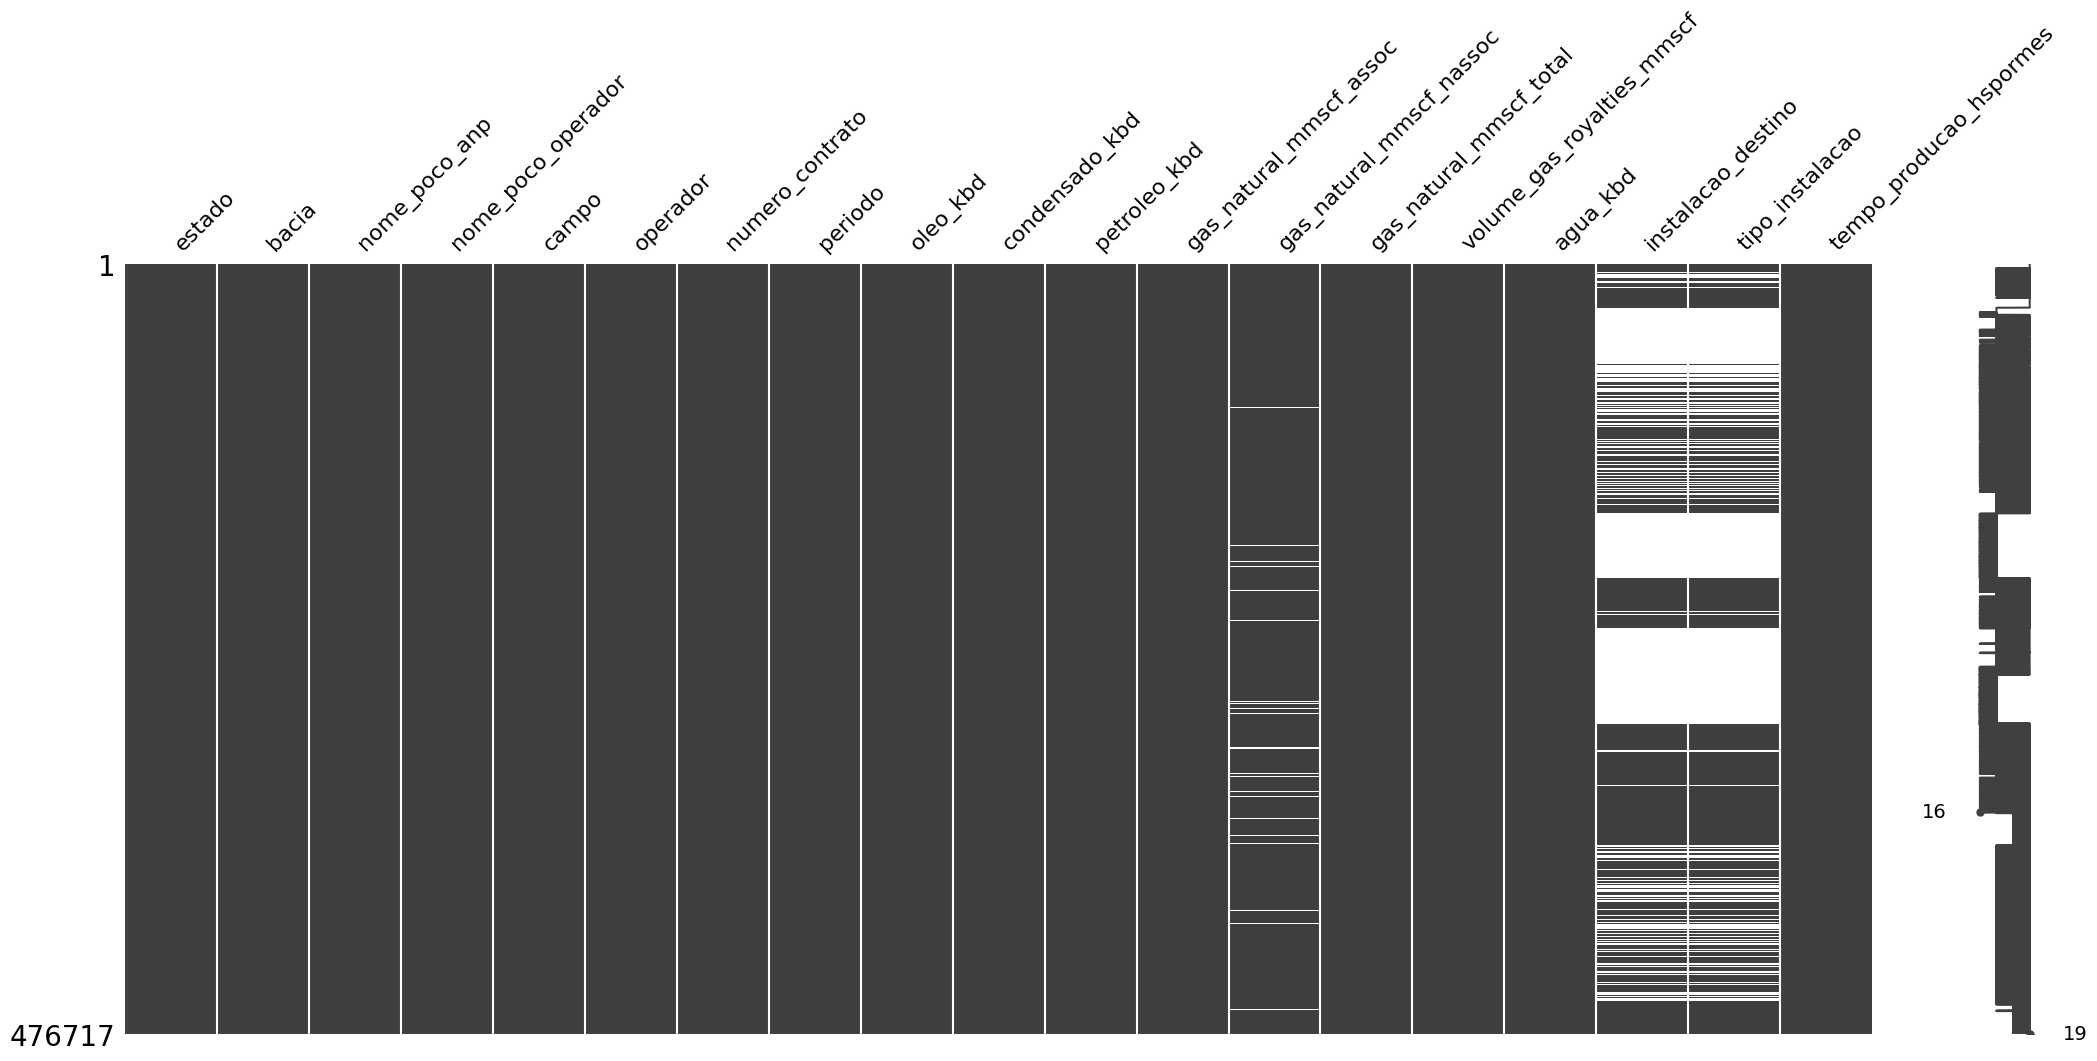

In [34]:
# Visualizar valores nulos
msno.matrix(df_production)

### Verificação quantitativa

Após termos realizado todas as etapas necessárias para termos uma base sólida, podemos prosseguir para a parte de visualizações. Iremos começar pela produção total no pré-sal por ano, comparando com o início da amostra em 2020, em seguida faremos outras análises de interesse.

A produção total de petróleo no pré-sal do Brasil tem mostrado um crescimento consistente nos últimos anos, mesmo diante dos desafios impostos pela pandemia de COVID-19 em 2020. Em 2020, a produção foi de 24,48 milhões de barris, refletindo os impactos da crise sanitária, que resultou em quedas na demanda global e interrupções operacionais.

No entanto, a recuperação foi rápida e acentuada. Em 2021, a produção aumentou para 25,70 milhões de barris, marcando uma variação percentual de 4,9% em relação a 2020. Esse crescimento inicial indica que as operações estavam se ajustando e adaptando ao novo cenário do mercado.

A trajetória ascendente continuou em 2022, com uma produção de 27,63 milhões de barris, representando uma variação de 12,2% em relação a 2020. Essa expansão é uma demonstração da resiliência da indústria, que se beneficiou de inovações tecnológicas e de um ambiente de preços mais favorável, com a recuperação da demanda global.

Em 2023, a produção subiu para 31,20 milhões de barris, um crescimento de 27,5% em comparação a 2020. O aumento acentuado neste ano pode ser atribuído ao crescimento da demanda e dos efeitos de reaquecimento das economias, e também devido à implementação de técnicas de perfuração mais eficientes e ao aumento do investimento em infraestrutura, que ampliaram a capacidade produtiva. Este crescimento também é impulsionado por um cenário geopolítico favorável, que elevou os preços do petróleo e estimulou novos investimentos no setor upstream.

Para 2024, a produção está projetada para alcançar mais de 32 milhões de barris, ou seja, ainda em crescimento em relação ao ano anterior. Esse crescimento, está previsto de forma conservadora, mas ainda indica uma continuidade na estabilidade e na força da produção no pré-sal e das tendências apresentadas.

In [ ]:
"""# Adicionar colunas de ano e mês ao DataFrame
df_production['ano'] = df_production['periodo'].dt.year
df_production['mes'] = df_production['periodo'].dt.month

# Agrupar os dados por ano e mês e somar a produção
producoes_mensais = df_production.groupby(['ano', 'mes'])['oleo_kbd'].sum().unstack()

# Criando gráfico de linhas para produção mensal
plt.figure(figsize=(12, 6))
for ano in producoes_mensais.index:
    plt.plot(producoes_mensais.columns, producoes_mensais.loc[ano] / 1000, marker='o', label=ano)  # Convertendo para milhões de barris

plt.title('Produção Mensal de Petróleo no Pré-Sal')
plt.xlabel('Mês')
plt.ylabel('Produção (milhões de barris)')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend(title='Ano')
plt.grid()
plt.tight_layout()
plt.show()



# Agrupar os dados por ano e somar a produção
producoes_anuais = df_production.groupby('ano')['oleo_kbd'].sum() / 1000  # Convertendo para milhões de barris

# Projetar a produção total de 2024
for year in producoes_anuais.index:
  if year == 2024:
    producoes_anuais[year] *= 60.84  # Multiplicando por 2 para projetar a produção de 2024
  else:
      producoes_anuais[year] *= 30.42

# Exibir o resultado para cada ano
for ano, media in producoes_anuais.items():
    print(f"Produção total de petróleo no pré-sal em {ano}, em milhões de barris: {media:.2f}")

# Criando gráfico de linhas para produção total anual
plt.figure(figsize=(12, 6))

# Criar uma lista de strings para os anos, incluindo a projeção para 2024
anos_strings = [str(year) for year in range(1980, 2024)]
anos_strings.append('2024* (projetada)')
print(anos_strings)

# Usar a lista de strings para os rótulos do eixo x
plt.plot(anos_strings, producoes_anuais.values, marker='o', color='purple', linestyle='-')
plt.title('Produção Total de Petróleo no Pré-Sal por Ano')
plt.xlabel('Ano')
plt.ylabel('Produção Total (milhões de barris)')
plt.grid()
plt.tight_layout()
plt.show()"""

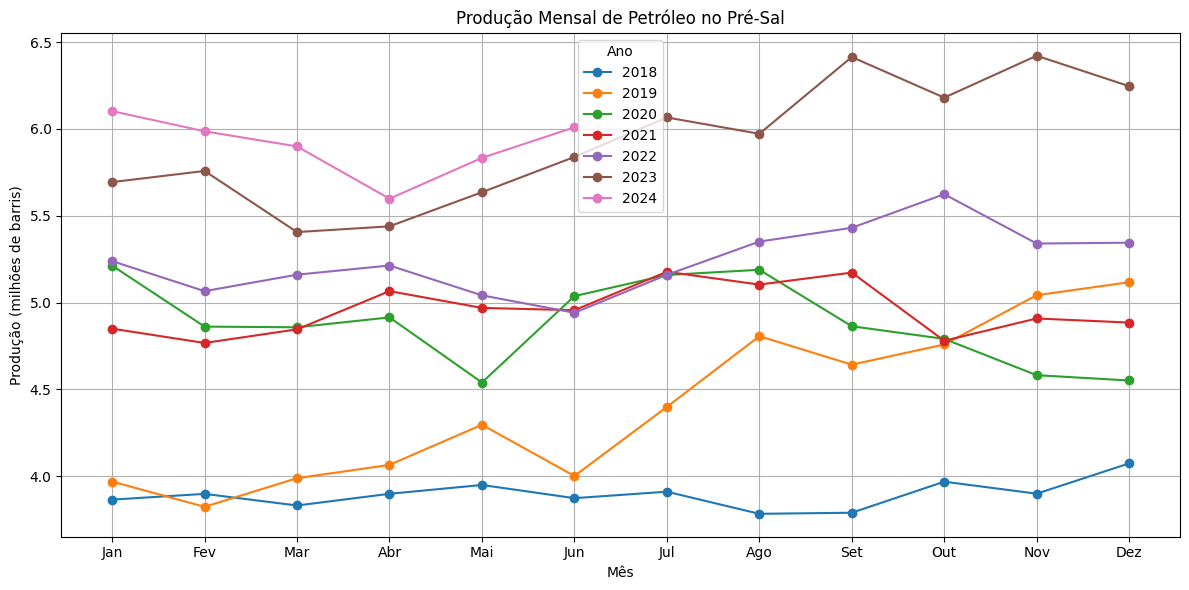

Produção total de petróleo no pré-sal em 1980, em milhões de barris: 27.26
Produção total de petróleo no pré-sal em 1981, em milhões de barris: 36.53
Produção total de petróleo no pré-sal em 1982, em milhões de barris: 51.48
Produção total de petróleo no pré-sal em 1983, em milhões de barris: 71.74
Produção total de petróleo no pré-sal em 1984, em milhões de barris: 113.95
Produção total de petróleo no pré-sal em 1985, em milhões de barris: 142.86
Produção total de petróleo no pré-sal em 1986, em milhões de barris: 148.16
Produção total de petróleo no pré-sal em 1987, em milhões de barris: 144.84
Produção total de petróleo no pré-sal em 1988, em milhões de barris: 136.89
Produção total de petróleo no pré-sal em 1989, em milhões de barris: 146.27
Produção total de petróleo no pré-sal em 1990, em milhões de barris: 161.59
Produção total de petróleo no pré-sal em 1991, em milhões de barris: 162.30
Produção total de petróleo no pré-sal em 1992, em milhões de barris: 161.11
Produção total d

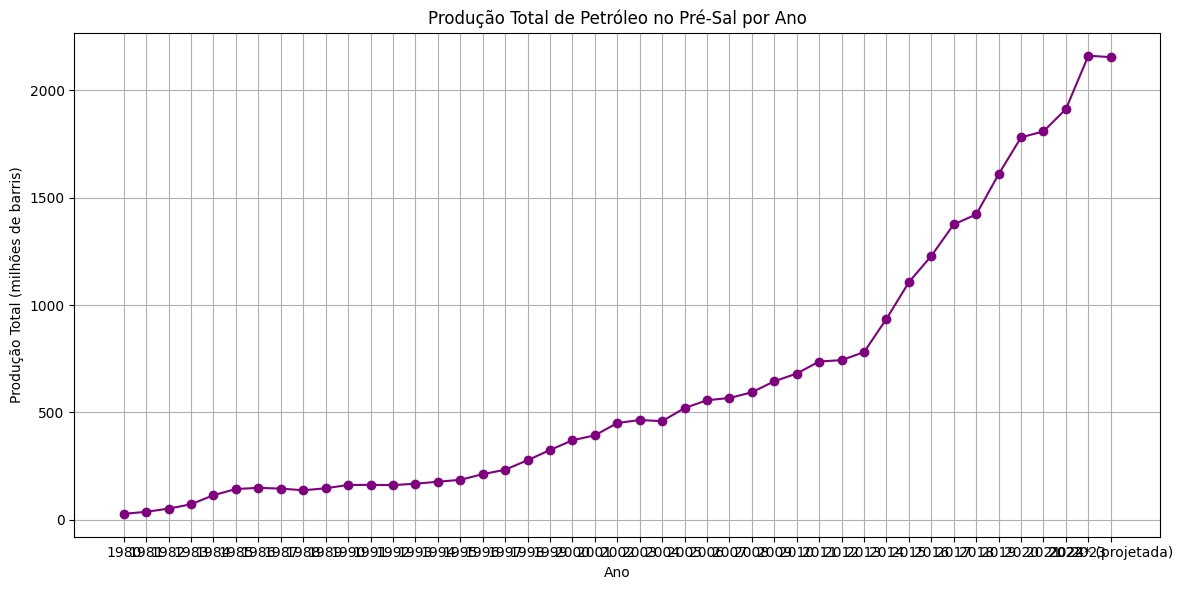

In [38]:
# Adicionar colunas de ano e mês ao DataFrame
df_production['ano'] = df_production['periodo'].dt.year
df_production['mes'] = df_production['periodo'].dt.month

# Filtrar dados de 2018 a 2024 para o gráfico de produção mensal
df_production_filtered = df_production[(df_production['ano'] >= 2018) & (df_production['ano'] <= 2024)]

# Agrupar os dados por ano e mês e somar a produção
producoes_mensais = df_production_filtered.groupby(['ano', 'mes'])['oleo_kbd'].sum().unstack()

# Criando gráfico de linhas para produção mensal
plt.figure(figsize=(12, 6))
for ano in producoes_mensais.index:
    plt.plot(producoes_mensais.columns, producoes_mensais.loc[ano] / 1000, marker='o', label=ano)  # Convertendo para milhões de barris

plt.title('Produção Mensal de Petróleo no Pré-Sal')
plt.xlabel('Mês')
plt.ylabel('Produção (milhões de barris)')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend(title='Ano')
plt.grid()
plt.tight_layout()
plt.show()

# Agrupar os dados por ano e somar a produção
producoes_anuais = df_production.groupby('ano')['oleo_kbd'].sum() / 1000  # Convertendo para milhões de barris

# Projetar a produção total de 2024
for year in producoes_anuais.index:
  if year == 2024:
    producoes_anuais[year] *= 60.84  # Multiplicando por 60.84 para projetar a produção de 2024
  else:
      producoes_anuais[year] *= 30.42

# Exibir o resultado para cada ano
for ano, media in producoes_anuais.items():
    print(f"Produção total de petróleo no pré-sal em {ano}, em milhões de barris: {media:.2f}")

# Criando gráfico de linhas para produção total anual
plt.figure(figsize=(12, 6))

# Criar uma lista de strings para os anos, incluindo a projeção para 2024
anos_strings = [str(year) for year in range(1980, 2024)]
anos_strings.append('2024* (projetada)')
print(anos_strings)

# Usar a lista de strings para os rótulos do eixo x
plt.plot(anos_strings, producoes_anuais.values, marker='o', color='purple', linestyle='-')
plt.title('Produção Total de Petróleo no Pré-Sal por Ano')
plt.xlabel('Ano')
plt.ylabel('Produção Total (milhões de barris)')
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
display(producoes_anuais)
display(producoes_mensais)

,oleo_kbd
ano,
2015,279.794118
2016,371.825345
2017,469.892298
2018,521.521314
2019,633.267964
2020,744.650899
2021,781.897205
2022,840.495147
2023,949.136916


mes,1,2,3,4,5,6,7,8,9,10,11,12
ano,,,,,,,,,,,,
2015,670.682927,656.869852,672.866857,714.644367,726.401809,751.161289,811.842801,859.773568,828.541703,809.787172,820.157617,874.972809
2016,823.022211,873.830734,883.747462,801.277787,928.875287,999.853187,1060.385333,1099.275098,1174.851903,1145.258652,1161.892977,1270.784768
2017,1276.241206,1233.250967,1208.061540,1207.469913,1265.183145,1352.956973,1292.606646,1270.646473,1351.406543,1305.956277,1326.836632,1356.204772
2018,1380.689083,1408.373978,1395.903587,1423.413571,1462.993965,1404.912812,1453.916834,1374.113076,1418.738575,1470.705776,1449.608132,1500.658019
2019,1456.026983,1449.995636,1542.063557,1572.252076,1673.973578,1551.263003,1731.921924,1927.907413,1827.297576,1905.285422,2061.703751,2117.796380
2020,2150.339967,1993.981484,1986.954545,2057.067807,1875.424301,2124.884836,2179.658339,2201.155122,2054.476559,2013.502537,1920.991300,1920.553971
2021,2074.203239,2044.812322,2097.934996,2181.982917,2129.260932,2142.295433,2221.126261,2193.164948,2255.324747,2088.746077,2141.960858,2132.579953
2022,2292.004278,2235.426467,2267.809169,2298.182826,2239.453059,2188.919130,2274.772223,2340.584068,2359.076452,2459.066840,2326.979078,2347.415664
2023,2489.664131,2566.039649,2363.173348,2370.190588,2509.825916,2552.822376,2638.245283,2591.399167,2829.529769,2722.262477,2825.207544,2742.721816


#### Observação

A produção de petróleo no ano de 2024, até o momento, é de 15,68 milhões de barris, correspondente aos dados disponíveis apenas até o meio do ano. Isso significa que, para ter uma estimativa da produção total anual, precisamos projetar a produção do restante do ano com base nos dados atuais.

Como estamos analisando apenas os primeiros seis meses de 2024, multiplicamos a produção registrada até agora por 2. Esta projeção assume que a produção dos próximos seis meses será semelhante à produção dos primeiros seis meses. Essa abordagem é comum em análises de produção quando os dados disponíveis são limitados, permitindo estimar um total anual mais realista, porém bem conservadora.

Projeção para o ano: 15,68 milhões de barris × 2 = 31,36 milhões de barris projetados para 2024.

### Análises de correlações

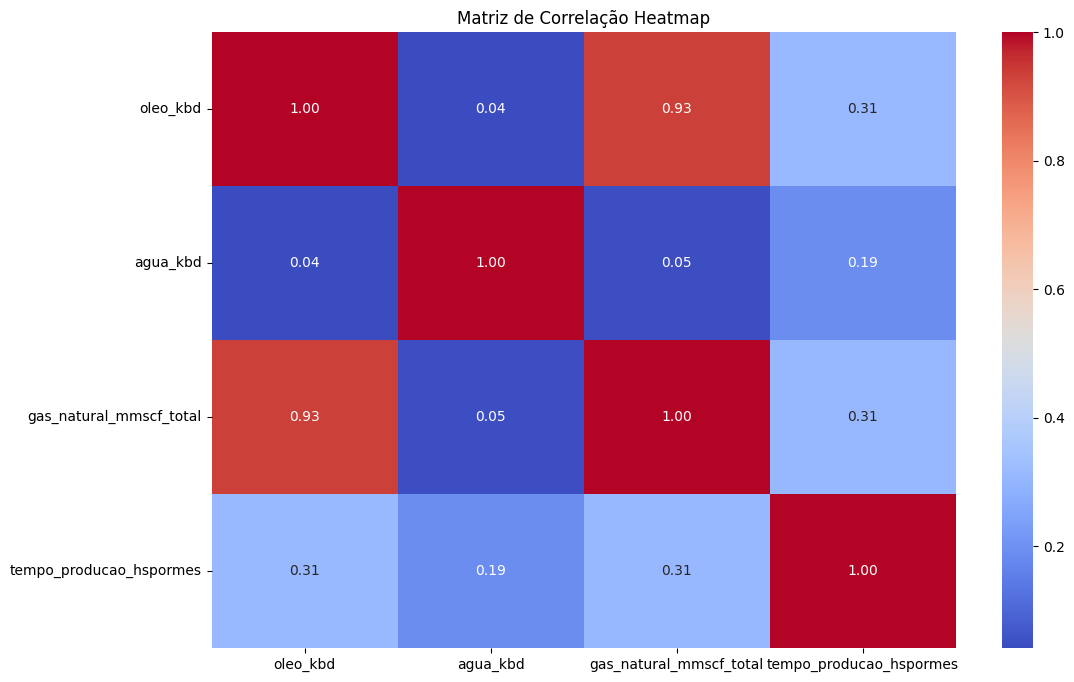

In [ ]:
# Filtrar apenas algumas colunas numéricas para analises de correlação (float64, int64)
colunas_numericas = ['oleo_kbd', 'agua_kbd', 'gas_natural_mmscf_total', 'tempo_producao_hspormes']

# Matriz de correlação apenas para colunas numéricas
correlacoes = df_production[colunas_numericas].corr()

# Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação Heatmap')
plt.show()

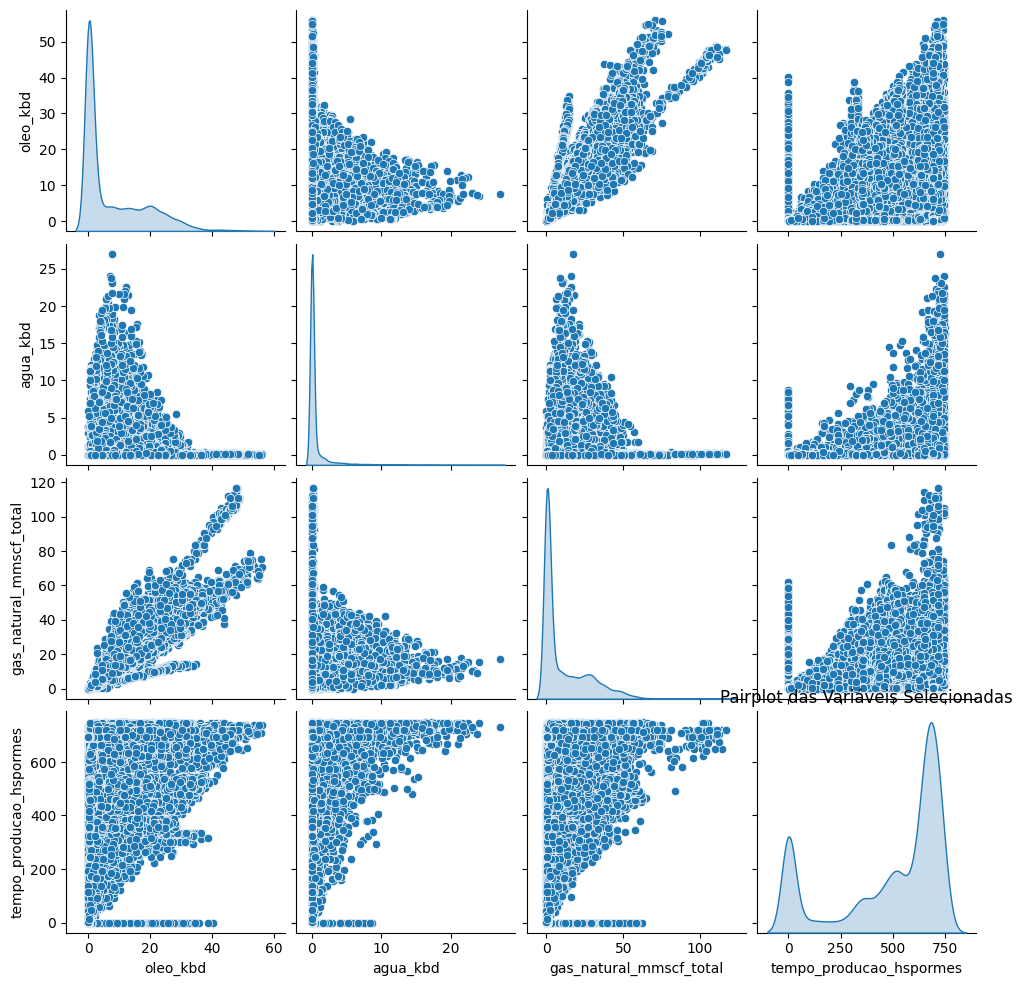

In [ ]:
# Criar o pairplot com o subconjunto de colunas
sns.pairplot(df_production[colunas_numericas], diag_kind='kde')
plt.title('Pairplot das Variáveis Selecionadas')
plt.show()

### Boxplots para detectar a distribuição e possíveis outliers

A maior parte da produção de óleo e gás está concentrada em poços de baixa a moderada produtividade. No entanto, há alguns poços com produções significativamente altas (outliers), o que pode indicar que a produção não está distribuída de forma uniforme entre os poços.

Já o tempo de produção por poço apresenta uma boa consistência da produção Brasileira no Pré-Sal nos últimos 5 anos. A maioria dos poços de petróleo parece operar por aproximadamente 20 a 29 dias por mês, o que representa entre 70% e 97% do mês. Poucos meses atingem a capacidade máxima de 720 horas (30 dias completos), indicando que paradas de produção são comuns. A presença de outliers sugere que, em alguns meses, os poços operaram por bem menos de 12 dias, o que pode ter sido causado por problemas ou manutenções específicas.



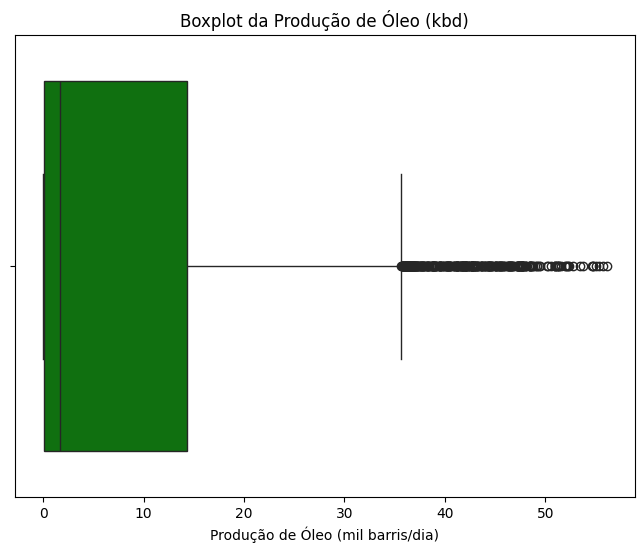

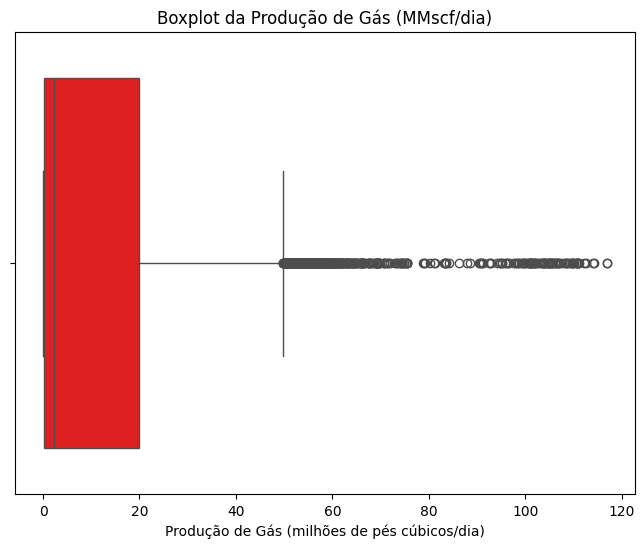

In [ ]:
# Boxplot para a produção de óleo
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_production['oleo_kbd'], color='green', orient='h')
plt.title('Boxplot da Produção de Óleo (kbd)')
plt.xlabel('Produção de Óleo (mil barris/dia)')
plt.show()

# Boxplot para a produção de gás
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_production['gas_natural_mmscf_total'], color='red', orient='h')
plt.title('Boxplot da Produção de Gás (MMscf/dia)')
plt.xlabel('Produção de Gás (milhões de pés cúbicos/dia)')
plt.show()

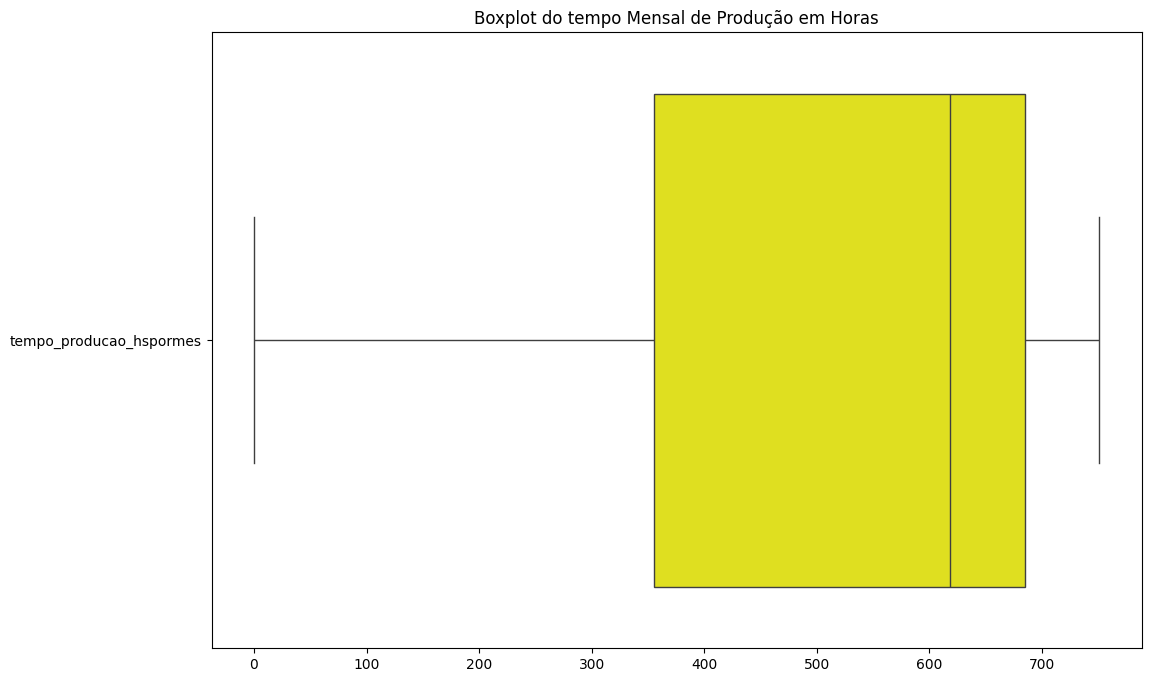

In [ ]:
# Boxplot para detectar a distribuição e possíveis outliers nas variáveis numéricas
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_production[['tempo_producao_hspormes']], color='yellow', orient='h')
plt.title('Boxplot do tempo Mensal de Produção em Horas')
plt.show()

### Visualização temporal da produção

Ao longo dos últimos cinco anos, a análise da produção de óleo e gás no pré-sal revela uma evolução significativa em ambas as frentes. Utilizando visualizações temporais, foi possível acompanhar a variação mês a mês, proporcionando insights sobre a tendência de produção no período avaliado.

Contudo, ao analisar os dados mais recentes, nota-se uma desaceleração que indica uma estagnação nos últimos meses. Os gráficos apontam para uma estabilização ou até uma leve queda tanto na produção de óleo quanto de gás. Isso pode estar relacionado a uma série de fatores como mudança na demanda global por petróleo, a transição para energias mais limpas, a alta dos preços, as preocupações com a segurança no fornecimento de energia, desaceleração da China entre outros fatores.

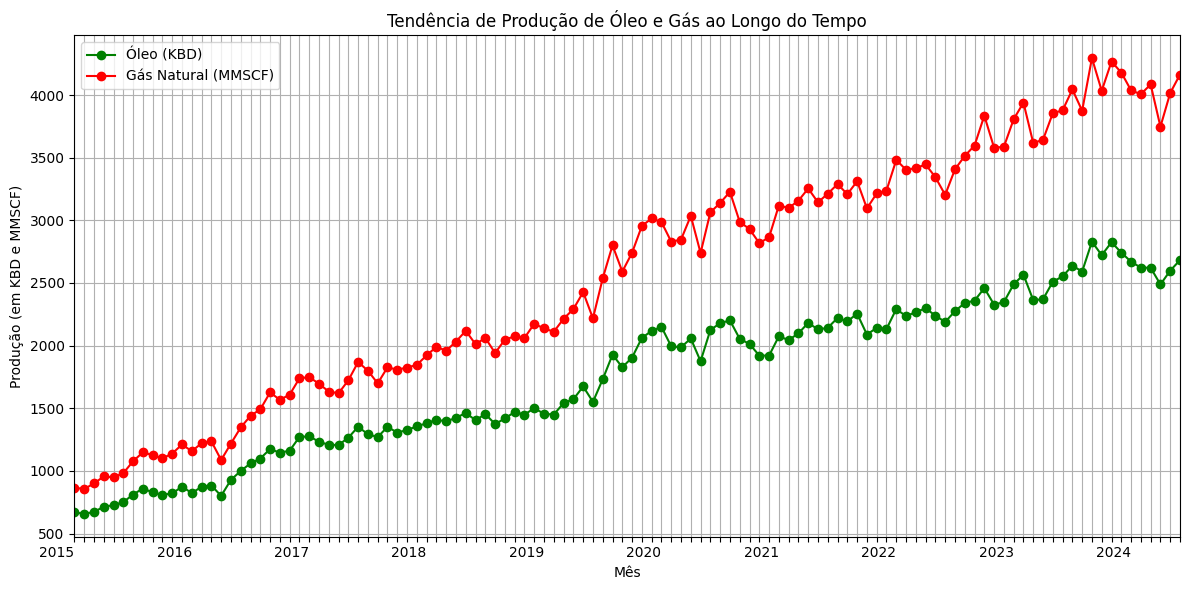

In [ ]:
# Ajustando o gráfico para exibir todos os meses do ano no eixo X
plt.figure(figsize=(12, 6))

# Agrupando por período (mês) e somando as produções de óleo e gás
df_production.groupby('periodo')['oleo_kbd'].sum().plot(label='Óleo (KBD)', marker='o', color='green')
df_production.groupby('periodo')['gas_natural_mmscf_total'].sum().plot(label='Gás Natural (MMSCF)', marker='o', color='red')

# Título e legenda
plt.title('Tendência de Produção de Óleo e Gás ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Produção (em KBD e MMSCF)')
plt.legend()

# Melhorando visualização do eixo X para mostrar mês e ano
plt.xticks(df_production['periodo'].dt.to_period('M').unique(), rotation=0, ha='right')  # Exibe no formato "Jan 2020", "Fev 2020", etc.
plt.grid(True)  # Adiciona grades para melhor visualização das inclinações

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()

### Visualização dos Maiores Campos Produtores do Pré-Sal

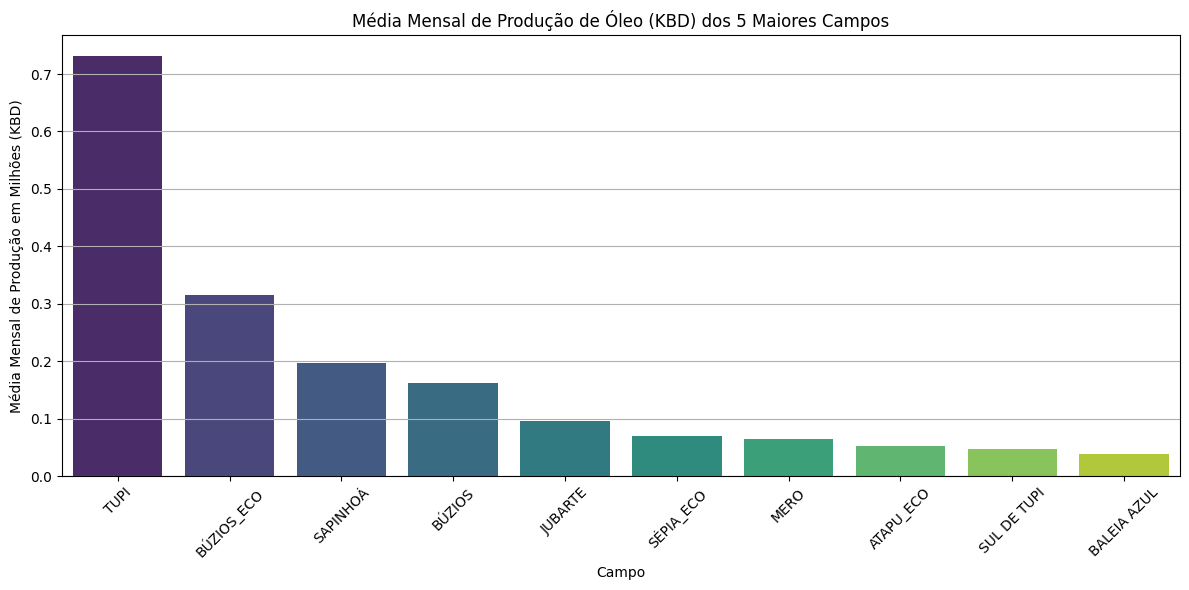

In [ ]:
# Adicionar coluna de ano ao DataFrame
df_production['ano'] = df_production['periodo'].dt.year

# Agrupar a produção total por ano e converter para KBD
producoes_totais_anuais = df_production.groupby('ano')['oleo_kbd'].sum() / 1000  # Convertendo para KBD

# Filtrar para campos que produziram
df_producao_produtiva = df_production[df_production['oleo_kbd'] > 0]

# Agrupar a produção por campo e ano, somando a produção
producoes_campos_anuais = (df_producao_produtiva.groupby(['ano', 'campo'])['oleo_kbd'].sum() / 1000).reset_index()  # Convertendo para KBD

# Calcular a média mensal
producoes_campos_anuais['Media_Mensal_KBD'] = producoes_campos_anuais['oleo_kbd'] / 12

# Selecionar os 5 maiores campos por média mensal
top_5 = producoes_campos_anuais.groupby('campo')['Media_Mensal_KBD'].mean().nlargest(10).reset_index()

# Criar gráfico de barras para a média mensal dos 5 maiores campos
plt.figure(figsize=(12, 6))
sns.barplot(x='campo', y='Media_Mensal_KBD', data=top_5, palette='viridis')
plt.xticks(rotation=45)
plt.title('Média Mensal de Produção de Óleo (KBD) dos 5 Maiores Campos')
plt.xlabel('Campo')
plt.ylabel('Média Mensal de Produção em Milhões (KBD)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

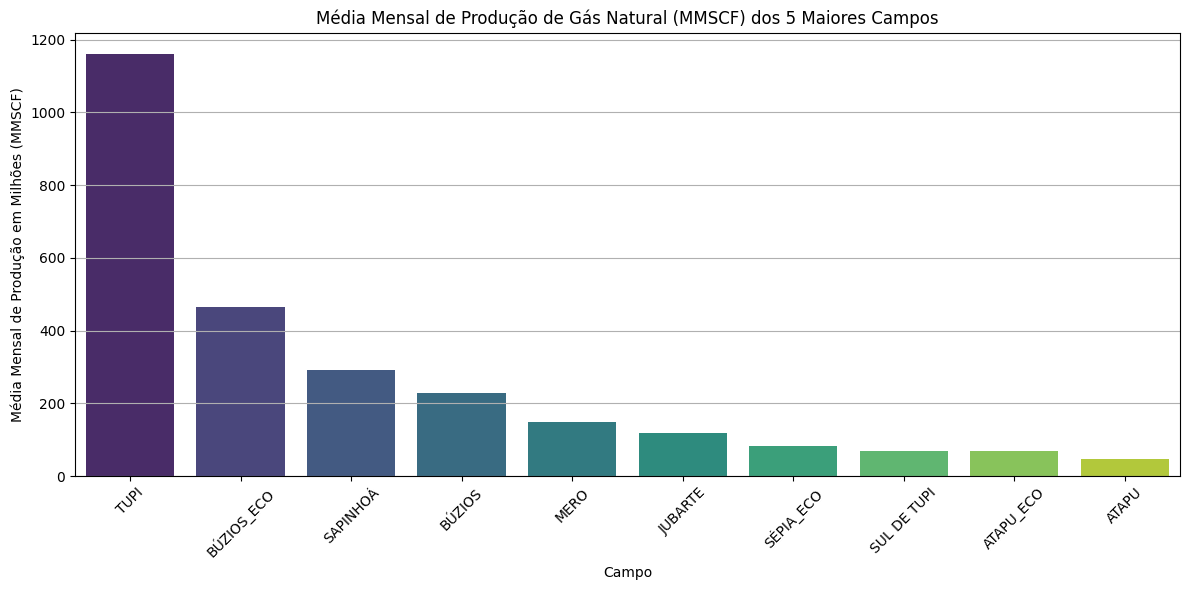

In [ ]:
# Agrupar a produção total de gás natural por ano e converter para MMSCF
producoes_totais_anuais_gas = df_production.groupby('ano')['gas_natural_mmscf_total'].sum()  # Total por ano

# Filtrar para campos que produziram gás
df_producao_produtiva_gas = df_production[df_production['gas_natural_mmscf_total'] > 0]

# Agrupar a produção por campo e ano, somando a produção de gás
producoes_campos_anuais_gas = (df_producao_produtiva_gas.groupby(['ano', 'campo'])['gas_natural_mmscf_total'].sum()).reset_index()

# Calcular a média mensal
producoes_campos_anuais_gas['Media_Mensal_MMSCF'] = producoes_campos_anuais_gas['gas_natural_mmscf_total'] / 12

# Selecionar os 5 maiores campos por média mensal
top_5_gas = producoes_campos_anuais_gas.groupby('campo')['Media_Mensal_MMSCF'].mean().nlargest(10).reset_index()

# Criar gráfico de barras para a média mensal dos 5 maiores campos
plt.figure(figsize=(12, 6))
sns.barplot(x='campo', y='Media_Mensal_MMSCF', data=top_5_gas, palette='viridis')
plt.xticks(rotation=45)
plt.title('Média Mensal de Produção de Gás Natural (MMSCF) dos 5 Maiores Campos')
plt.xlabel('Campo')
plt.ylabel('Média Mensal de Produção em Milhões (MMSCF)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


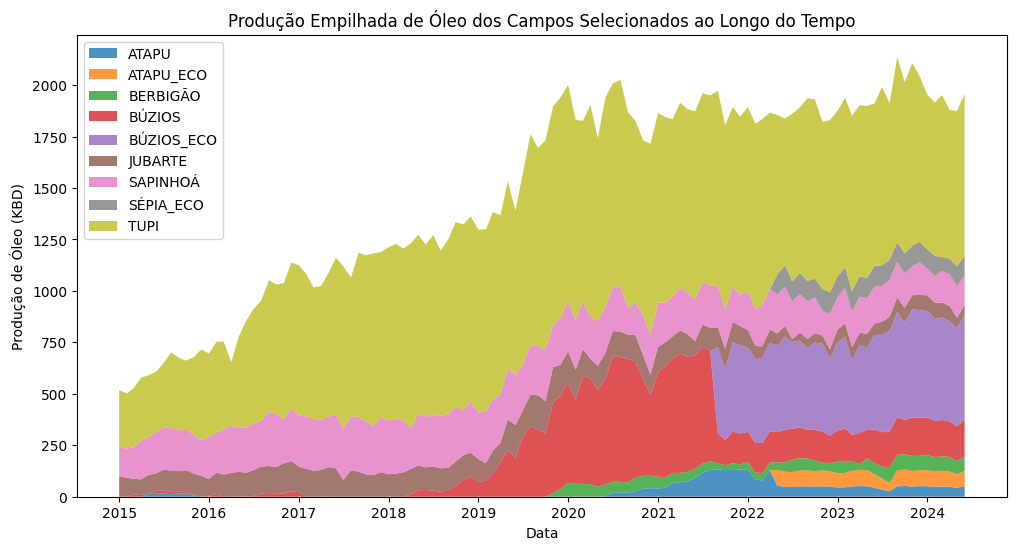

In [ ]:
# Filtrar para os campos desejados
campos_selecionados = [
    'TUPI', 'BÚZIOS_ECO', 'BÚZIOS', 'SAPINHOÁ', 'MERGULHO',
    'JUBARTE', 'SÉPIA_ECO', 'ATAPU_ECO', 'ATAPU', 'BERBIGÃO'
]

df_campos_selecionados = df_production[df_production['campo'].isin(campos_selecionados)]

# Agrupando por período (mês) e campo, somando as produções de óleo
producoes_mensais = df_campos_selecionados.groupby(['periodo', 'campo'])['oleo_kbd'].sum().reset_index()

# Criar uma coluna de Data para o eixo X
producoes_mensais['data'] = pd.to_datetime(producoes_mensais['periodo'])

# Pivotar os dados para um formato adequado para o gráfico empilhado
producoes_pivotadas = producoes_mensais.pivot(index='data', columns='campo', values='oleo_kbd').fillna(0)

# Criar gráfico empilhado
plt.figure(figsize=(12, 6))
plt.stackplot(
    producoes_pivotadas.index,
    producoes_pivotadas.T,  # Transpor para que os campos sejam as séries
    labels=producoes_pivotadas.columns,
    alpha=0.8
)

# Título e legendas
plt.title('Produção Empilhada de Óleo dos Campos Selecionados ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Produção de Óleo (KBD)')
plt.legend(loc='upper left')

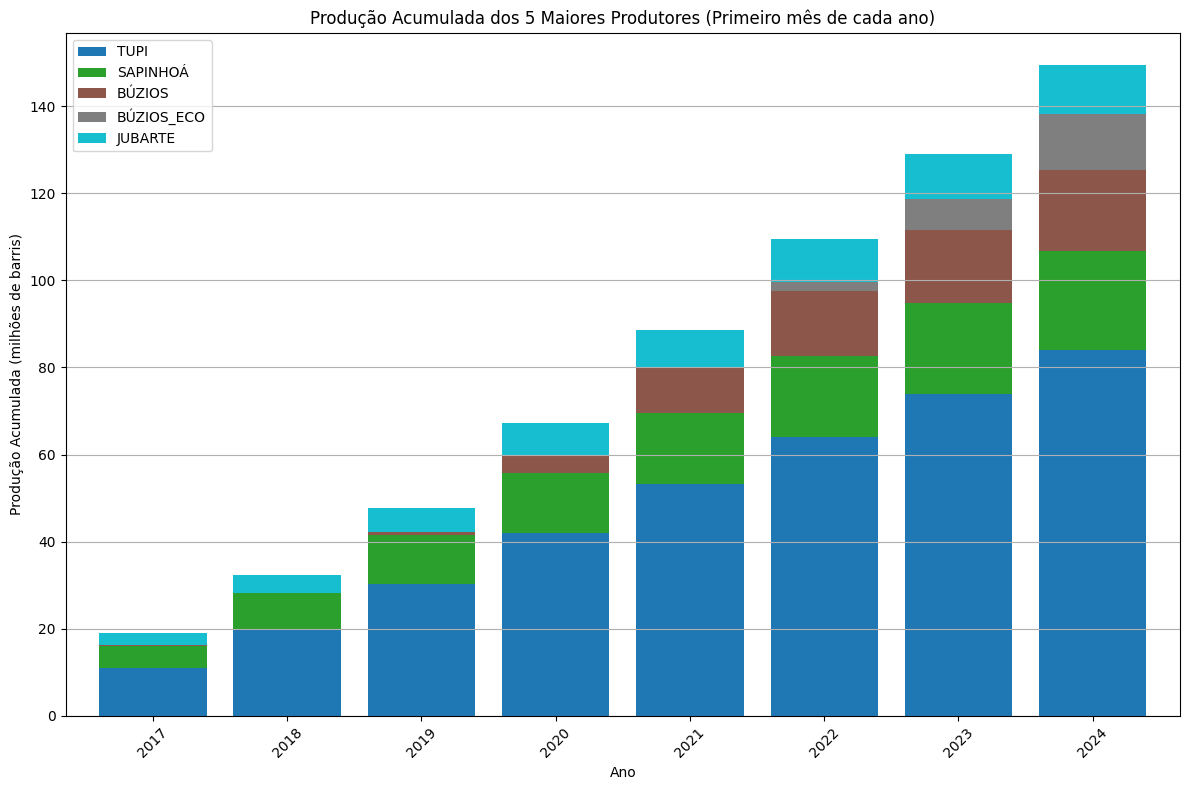

In [ ]:
# Encontrar os 5 maiores produtores
maiores_produtores = df_production.groupby('campo')['oleo_kbd'].sum().nlargest(5).index.tolist()

# Criar um DataFrame para a produção acumulada
df_acumulado = pd.DataFrame()

for campo in maiores_produtores:
    # Filtrar dados para o campo atual
    df_campo = df_production[df_production['campo'] == campo]

    # Agrupar por período e somar a produção
    producoes_diarias = df_campo.groupby(df_campo['periodo'].dt.date)['oleo_kbd'].sum()

    # Calcular a produção acumulada
    producoes_acumuladas = producoes_diarias.cumsum() / 1000  # Convertendo para milhões de barris

    # Adicionar ao DataFrame
    df_acumulado[campo] = producoes_acumuladas

# Convertendo o índice para datetime, caso não esteja no formato correto
df_acumulado.index = pd.to_datetime(df_acumulado.index)

# Agora, filtrar apenas o primeiro mês de cada ano
df_acumulado_ano = df_acumulado[df_acumulado.index.month == 1]

# Filtrar para remover 2015 e 2016
df_acumulado_ano = df_acumulado_ano[df_acumulado_ano.index.year >= 2017]

# Criar gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
df_acumulado_ano.plot(kind='bar', stacked=True, colormap='tab10', ax=plt.gca(), width=0.8)

# Configurações do gráfico
plt.title('Produção Acumulada dos 5 Maiores Produtores (Primeiro mês de cada ano)')
plt.xlabel('Ano')
plt.ylabel('Produção Acumulada (milhões de barris)')

# Ajustar o eixo X para mostrar apenas os anos
plt.xticks(ticks=range(len(df_acumulado_ano)), labels=df_acumulado_ano.index.year, rotation=45)

# Adicionar grade ao gráfico
plt.grid(axis='y')

# Ajustar layout para não cortar a legenda
plt.tight_layout()

# Exibir o gráfico
plt.show()

# Exibir o DataFrame e verificar os tipos de dados
#display(df_acumulado_ano)
#print(df_acumulado_ano.dtypes)

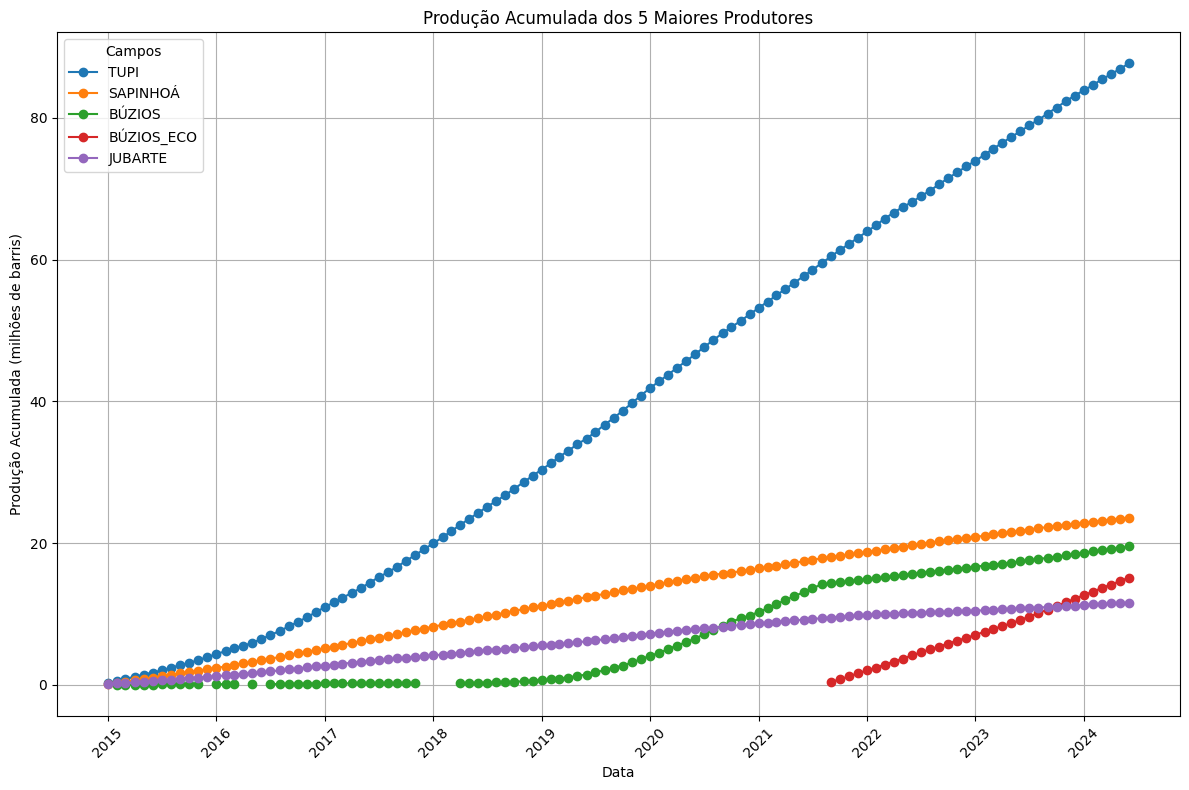

In [ ]:
# Encontrar os 5 maiores produtores
maiores_produtores = df_production.groupby('campo')['oleo_kbd'].sum().nlargest(5).index.tolist()

# Criar um DataFrame para a produção acumulada
df_acumulado = pd.DataFrame()

for campo in maiores_produtores:
    # Filtrar dados para o campo atual
    df_campo = df_production[df_production['campo'] == campo]

    # Agrupar por período e somar a produção
    producoes_diarias = df_campo.groupby(df_campo['periodo'].dt.date)['oleo_kbd'].sum()

    # Calcular a produção acumulada
    producoes_acumuladas = producoes_diarias.cumsum() / 1000  # Convertendo para milhões de barris

    # Adicionar ao DataFrame
    df_acumulado[campo] = producoes_acumuladas

# Criar gráfico de linhas
plt.figure(figsize=(12, 8))

# Plotar cada campo em uma linha
for campo in df_acumulado.columns:
    plt.plot(df_acumulado.index, df_acumulado[campo], marker='o', label=campo)

# Configurações do gráfico
plt.title('Produção Acumulada dos 5 Maiores Produtores')
plt.xlabel('Data')
plt.ylabel('Produção Acumulada (milhões de barris)')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Campos')
plt.tight_layout()

# Exibir o gráfico
plt.show()

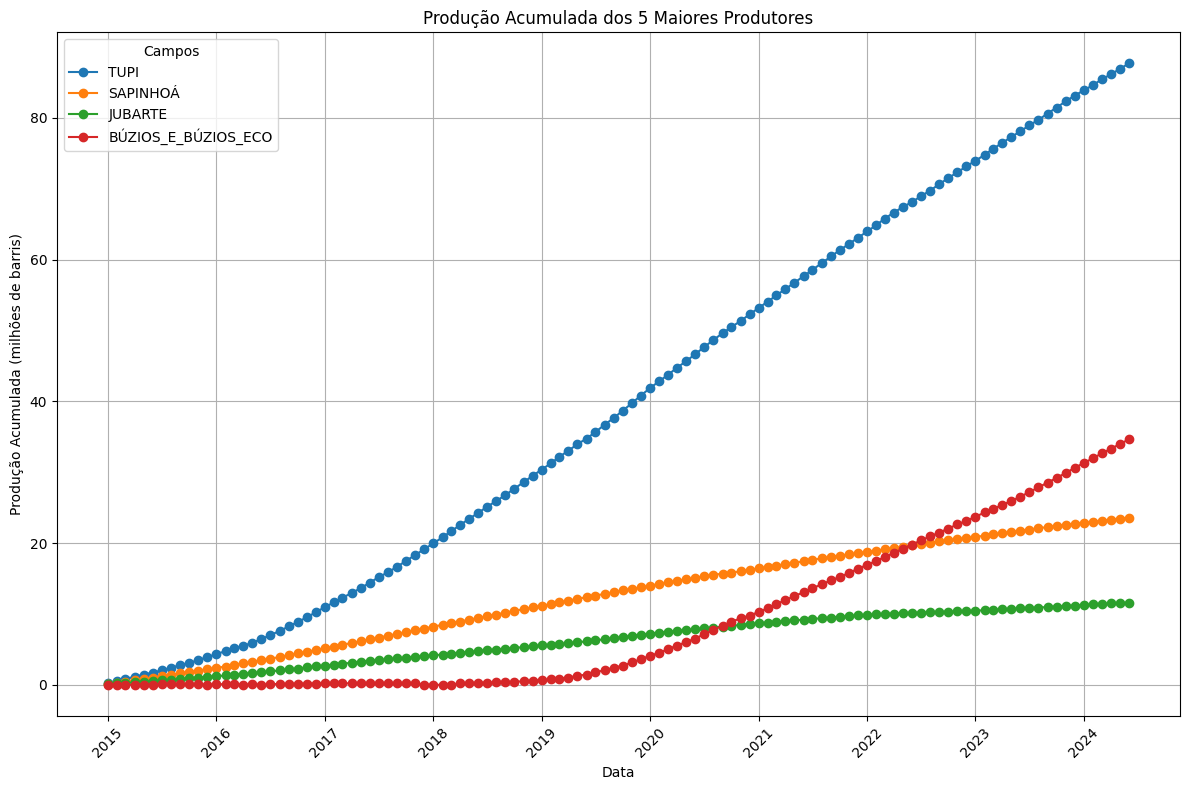

In [ ]:
# Encontrar os 5 maiores produtores
maiores_produtores = df_production.groupby('campo')['oleo_kbd'].sum().nlargest(5).index.tolist()

# Criar um DataFrame para a produção acumulada
df_acumulado = pd.DataFrame()

for campo in maiores_produtores:
    # Filtrar dados para o campo atual
    df_campo = df_production[df_production['campo'] == campo]

    # Agrupar por período e somar a produção
    producoes_diarias = df_campo.groupby(df_campo['periodo'].dt.date)['oleo_kbd'].sum()

    # Calcular a produção acumulada
    producoes_acumuladas = producoes_diarias.cumsum() / 1000  # Convertendo para milhões de barris

    # Adicionar ao DataFrame
    df_acumulado[campo] = producoes_acumuladas


# Juntar "BÚZIOS" e "BÚZIOS_ECO" em uma nova coluna, preenchendo valores NaN com 0
df_acumulado['BÚZIOS_E_BÚZIOS_ECO'] = df_acumulado['BÚZIOS'].fillna(0) + df_acumulado['BÚZIOS_ECO'].fillna(0)


# Remover as colunas antigas
df_acumulado.drop(['BÚZIOS', 'BÚZIOS_ECO'], axis=1, inplace=True)


# Criar gráfico de linhas
plt.figure(figsize=(12, 8))

# Plotar cada campo em uma linha
for campo in df_acumulado.columns:
    plt.plot(df_acumulado.index, df_acumulado[campo], marker='o', label=campo)

# Configurações do gráfico
plt.title('Produção Acumulada dos 5 Maiores Produtores')
plt.xlabel('Data')
plt.ylabel('Produção Acumulada (milhões de barris)')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Campos')
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [ ]:
# Step 1: Import required module
from google.colab import files

# Step 2: Save your DataFrame to a CSV file
df_production.to_csv('2015_2024_pre-salt_oil-gas-water_production.csv')

# Step 3: Download the file to your local machine
files.download('2015_2024_pre-salt_oil-gas-water_production.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Normalização e Padronização dos Dados

Normalização e padronização são técnicas essenciais na pré-processamento de dados, especialmente em contextos de machine learning e análise de dados. Ambas têm como objetivo transformar os dados de entrada, mas fazem isso de maneiras diferentes.

O trecho de código que utiliza MinMaxScaler() aplica a normalização, escalando os dados para um intervalo entre 0 e 1. O trecho que utiliza StandardScaler() aplica a padronização, transformando os dados para que tenham média zero e desvio padrão um, que possivelmente será a técnica utilizada quando formos trabalhar com os modelos de Machine Learning devido à natureza do dado se assemelhar à curvas normais. Porém será necessário validar e avaliar caso a caso para garantir o melhor orientando-se aos dados.

In [ ]:
# Verificar valores faltantes
missing_values = df_production.isnull().sum()
print(missing_values[missing_values > 0])

# Exemplo de remoção de linhas com valores faltantes
df_production.dropna(inplace=True)

instalacao_destino    2581
tipo_instalacao       2581
dtype: int64


In [ ]:
# One-Hot Encoding para colunas categóricas
colunas_categoricas = ["estado", "bacia", "operador", "campo", "tipo_instalacao"]
df_production = pd.get_dummies(df_production, columns=colunas_categoricas, drop_first=True)
display(df_production)

,nome_poco_anp,nome_poco_operador,numero_contrato,periodo,oleo_kbd,condensado_kbd,petroleo_kbd,gas_natural_mmscf_assoc,gas_natural_mmscf_nassoc,gas_natural_mmscf_total,volume_gas_royalties_mmscf,agua_kbd,instalacao_destino,tempo_producao_hspormes,ano,mes,estado_Rio de Janeiro,estado_São Paulo,bacia_Santos,operador_TotalEnergies EP,operador_Trident Energy,campo_ATAPU,campo_ATAPU_ECO,campo_AnC_BRAVA,...,campo_JUBARTE,campo_LAPA,campo_LINGUADO,campo_MARLIM,campo_MARLIM LESTE,campo_MARLIM SUL,campo_MERO,campo_NORDESTE DE SAPINHOÁ,campo_NOROESTE DE SAPINHOÁ,campo_OESTE DE ATAPU,campo_PAMPO,campo_PIRAMBU,campo_SAPINHOÁ,campo_SUDOESTE DE SAPINHOÁ,campo_SUL DE BERBIGÃO,campo_SUL DE TUPI,campo_SURURU,campo_SÉPIA,campo_SÉPIA LESTE,campo_SÉPIA_ECO,campo_TAMBUATÁ,campo_TRILHA,campo_TUPI,campo_VOADOR
unique_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f52ac5c38305be3794a1e3c33b50ad2b,7-CRT-49-RJS,7CRT49RJS,480000038989755,2015-01-01,0.923630,0.0,0.923630,0.519151,0.0,0.519151,16.073501,0.003282,PETROBRAS 48,0,2015,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
cc08faf9143d9770b43d2397a717f377,4-RJS-265A-RJS,4RJS 0265A RJ,480000037089718,2015-01-01,0.245571,0.0,0.245571,0.219449,0.0,0.219449,6.802927,0.000325,PETROBRAS 12,0,2015,1,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
e55d8086a27e1a06e121e376e2bb3cba,6-BRSA-639-ESS,6BFR1ESS,480000035609749,2015-01-01,18.192739,0.0,18.192739,21.315999,0.0,21.315999,660.007324,0.396746,FPSO CAPIXABA,0,2015,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2d024096b105949a88a78ab16c058057,1-BRSA-594-SPS,1SPS55,486100038842000,2015-01-01,17.314437,0.0,17.314437,20.607621,0.0,20.607621,388.864119,0.000000,FPSO CIDADE DE SÃO PAULO,0,2015,1,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1560cdd99c05d21b8ec52e416d720760,3-BRSA-788-SPS,3SPS69,486100038842000,2015-01-01,29.542870,0.0,29.542870,37.472093,0.0,37.472093,707.095264,0.000000,FPSO CIDADE DE ILHA BELA,0,2015,1,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cc361d1b58662dd4ecd85d55f34b1c89,9-BRSA-1284-RJS,9RJS730,48610012913201005,2024-06-01,13.917944,0.0,13.917944,17.154479,0.0,17.154479,49.562274,0.011662,Petrobras 70,355,2024,6,True,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
357c26b51f31be6a37b515ed00f69a73,7-ATP-6-RJS,7ATP6RJS,48610012913201005,2024-06-01,24.884289,0.0,24.884289,40.381367,0.0,40.381367,116.668857,0.020891,Petrobras 70,355,2024,6,True,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
614e811a8aaf9fc456dcdaca40ec3fae,1-BRSA-1146-RJS,1RJS711,48610012913201005,2024-06-01,2.134739,0.0,2.134739,3.647567,0.0,3.647567,10.538436,0.001736,Petrobras 70,322,2024,6,True,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [ ]:
# Separar colunas numéricas
colunas_numericas = [
    "oleo_kbd", "petroleo_kbd", "gas_natural_mmscf_assoc",
    "gas_natural_mmscf_nassoc", "gas_natural_mmscf_total", "volume_gas_royalties_mmscf",
    "agua_kbd", "tempo_producao_hspormes"
    ]

# Criar cópias do DataFrame original para normalização e padronização
df_production_normal = df_production.copy()
df_production_padrao = df_production.copy()

# Normalização
scaler_minmax = MinMaxScaler()
df_production_normal[colunas_numericas] = scaler_minmax.fit_transform(df_production[colunas_numericas])

# Padronização
scaler_standard = StandardScaler()
df_production_padrao[colunas_numericas] = scaler_standard.fit_transform(df_production[colunas_numericas])

# Exibir as primeiras linhas dos novos DataFrames
display('Producão Normalizada', df_production_normal.head(10))
display('Produção Padronizada', df_production_padrao.head(10))


'Producão Normalizada'

,nome_poco_anp,nome_poco_operador,numero_contrato,periodo,oleo_kbd,condensado_kbd,petroleo_kbd,gas_natural_mmscf_assoc,gas_natural_mmscf_nassoc,gas_natural_mmscf_total,volume_gas_royalties_mmscf,agua_kbd,instalacao_destino,tempo_producao_hspormes,ano,mes,estado_Rio de Janeiro,estado_São Paulo,bacia_Santos,operador_TotalEnergies EP,operador_Trident Energy,campo_ATAPU,campo_ATAPU_ECO,campo_AnC_BRAVA,...,campo_JUBARTE,campo_LAPA,campo_LINGUADO,campo_MARLIM,campo_MARLIM LESTE,campo_MARLIM SUL,campo_MERO,campo_NORDESTE DE SAPINHOÁ,campo_NOROESTE DE SAPINHOÁ,campo_OESTE DE ATAPU,campo_PAMPO,campo_PIRAMBU,campo_SAPINHOÁ,campo_SUDOESTE DE SAPINHOÁ,campo_SUL DE BERBIGÃO,campo_SUL DE TUPI,campo_SURURU,campo_SÉPIA,campo_SÉPIA LESTE,campo_SÉPIA_ECO,campo_TAMBUATÁ,campo_TRILHA,campo_TUPI,campo_VOADOR
unique_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f52ac5c38305be3794a1e3c33b50ad2b,7-CRT-49-RJS,7CRT49RJS,480000038989755,2015-01-01,0.016466,0.0,0.016466,0.004442,0.0,0.004442,0.011794,0.000121,PETROBRAS 48,0.0,2015,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
cc08faf9143d9770b43d2397a717f377,4-RJS-265A-RJS,4RJS 0265A RJ,480000037089718,2015-01-01,0.004378,0.0,0.004378,0.001878,0.0,0.001878,0.004991,0.000012,PETROBRAS 12,0.0,2015,1,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
e55d8086a27e1a06e121e376e2bb3cba,6-BRSA-639-ESS,6BFR1ESS,480000035609749,2015-01-01,0.324325,0.0,0.324325,0.182373,0.0,0.182373,0.484264,0.014682,FPSO CAPIXABA,0.0,2015,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2d024096b105949a88a78ab16c058057,1-BRSA-594-SPS,1SPS55,486100038842000,2015-01-01,0.308667,0.0,0.308667,0.176312,0.0,0.176312,0.285319,0.000000,FPSO CIDADE DE SÃO PAULO,0.0,2015,1,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1560cdd99c05d21b8ec52e416d720760,3-BRSA-788-SPS,3SPS69,486100038842000,2015-01-01,0.526666,0.0,0.526666,0.320599,0.0,0.320599,0.518814,0.000000,FPSO CIDADE DE ILHA BELA,0.0,2015,1,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
915b05d1f0c674ae1567ecdeb1f3aaca,9-BRSA-928-SPS,9SPS77A,486100038842000,2015-01-01,0.557700,0.0,0.557700,0.320303,0.0,0.320303,0.518335,0.000000,FPSO CIDADE DE SÃO PAULO,0.0,2015,1,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
8d13e3bba959524895836e91b9508fdc,7-SPH-3-SPS,7SPH3SPS,486100038842000,2015-01-01,0.009268,0.0,0.009268,0.006649,0.0,0.006649,0.010760,0.000000,SCHAHIN VICTORIA 10K,0.0,2015,1,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
56683cc53ddf0c1ba6bd388a8d944b75,7-SPH-4D-SPS,7SPH4DSPS,486100038842000,2015-01-01,0.535788,0.0,0.535788,0.308903,0.0,0.308903,0.499886,0.000000,FPSO CIDADE DE SÃO PAULO,0.0,2015,1,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
d47313caee7cfecc171fa861b0b3d20e,7-SPH-5-SPS,7SPH5SPS,486100038842000,2015-01-01,0.612632,0.0,0.612632,0.339069,0.0,0.339069,0.548702,0.000000,FPSO CIDADE DE SÃO PAULO,0.0,2015,1,

'Produção Padronizada'

,nome_poco_anp,nome_poco_operador,numero_contrato,periodo,oleo_kbd,condensado_kbd,petroleo_kbd,gas_natural_mmscf_assoc,gas_natural_mmscf_nassoc,gas_natural_mmscf_total,volume_gas_royalties_mmscf,agua_kbd,instalacao_destino,tempo_producao_hspormes,ano,mes,estado_Rio de Janeiro,estado_São Paulo,bacia_Santos,operador_TotalEnergies EP,operador_Trident Energy,campo_ATAPU,campo_ATAPU_ECO,campo_AnC_BRAVA,...,campo_JUBARTE,campo_LAPA,campo_LINGUADO,campo_MARLIM,campo_MARLIM LESTE,campo_MARLIM SUL,campo_MERO,campo_NORDESTE DE SAPINHOÁ,campo_NOROESTE DE SAPINHOÁ,campo_OESTE DE ATAPU,campo_PAMPO,campo_PIRAMBU,campo_SAPINHOÁ,campo_SUDOESTE DE SAPINHOÁ,campo_SUL DE BERBIGÃO,campo_SUL DE TUPI,campo_SURURU,campo_SÉPIA,campo_SÉPIA LESTE,campo_SÉPIA_ECO,campo_TAMBUATÁ,campo_TRILHA,campo_TUPI,campo_VOADOR
unique_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f52ac5c38305be3794a1e3c33b50ad2b,7-CRT-49-RJS,7CRT49RJS,480000038989755,2015-01-01,-0.736513,0.0,-0.736513,-0.735171,0.0,-0.735171,-0.677981,-0.322894,PETROBRAS 48,-2.591246,2015,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
cc08faf9143d9770b43d2397a717f377,4-RJS-265A-RJS,4RJS 0265A RJ,480000037089718,2015-01-01,-0.801599,0.0,-0.801599,-0.753458,0.0,-0.753458,-0.717697,-0.324276,PETROBRAS 12,-2.591246,2015,1,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
e55d8086a27e1a06e121e376e2bb3cba,6-BRSA-639-ESS,6BFR1ESS,480000035609749,2015-01-01,0.921126,0.0,0.921126,0.533754,0.0,0.533754,2.080711,-0.139025,FPSO CAPIXABA,-2.591246,2015,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2d024096b105949a88a78ab16c058057,1-BRSA-594-SPS,1SPS55,486100038842000,2015-01-01,0.836819,0.0,0.836819,0.490532,0.0,0.490532,0.919100,-0.324428,FPSO CIDADE DE SÃO PAULO,-2.591246,2015,1,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1560cdd99c05d21b8ec52e416d720760,3-BRSA-788-SPS,3SPS69,486100038842000,2015-01-01,2.010610,0.0,2.010610,1.519522,0.0,1.519522,2.282442,-0.324428,FPSO CIDADE DE ILHA BELA,-2.591246,2015,1,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
915b05d1f0c674ae1567ecdeb1f3aaca,9-BRSA-928-SPS,9SPS77A,486100038842000,2015-01-01,2.177712,0.0,2.177712,1.517411,0.0,1.517411,2.279645,-0.324428,FPSO CIDADE DE SÃO PAULO,-2.591246,2015,1,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
8d13e3bba959524895836e91b9508fdc,7-SPH-3-SPS,7SPH3SPS,486100038842000,2015-01-01,-0.775266,0.0,-0.775266,-0.719431,0.0,-0.719431,-0.684017,-0.324428,SCHAHIN VICTORIA 10K,-2.591246,2015,1,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
56683cc53ddf0c1ba6bd388a8d944b75,7-SPH-4D-SPS,7SPH4DSPS,486100038842000,2015-01-01,2.059726,0.0,2.059726,1.436108,0.0,1.436108,2.171923,-0.324428,FPSO CIDADE DE SÃO PAULO,-2.591246,2015,1,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
d47313caee7cfecc171fa861b0b3d20e,7-SPH-5-SPS,7SPH5SPS,486100038842000,2015-01-01,2.473488,0.0,2.473488,1.651

### Visualização da Normalização e da Padronização

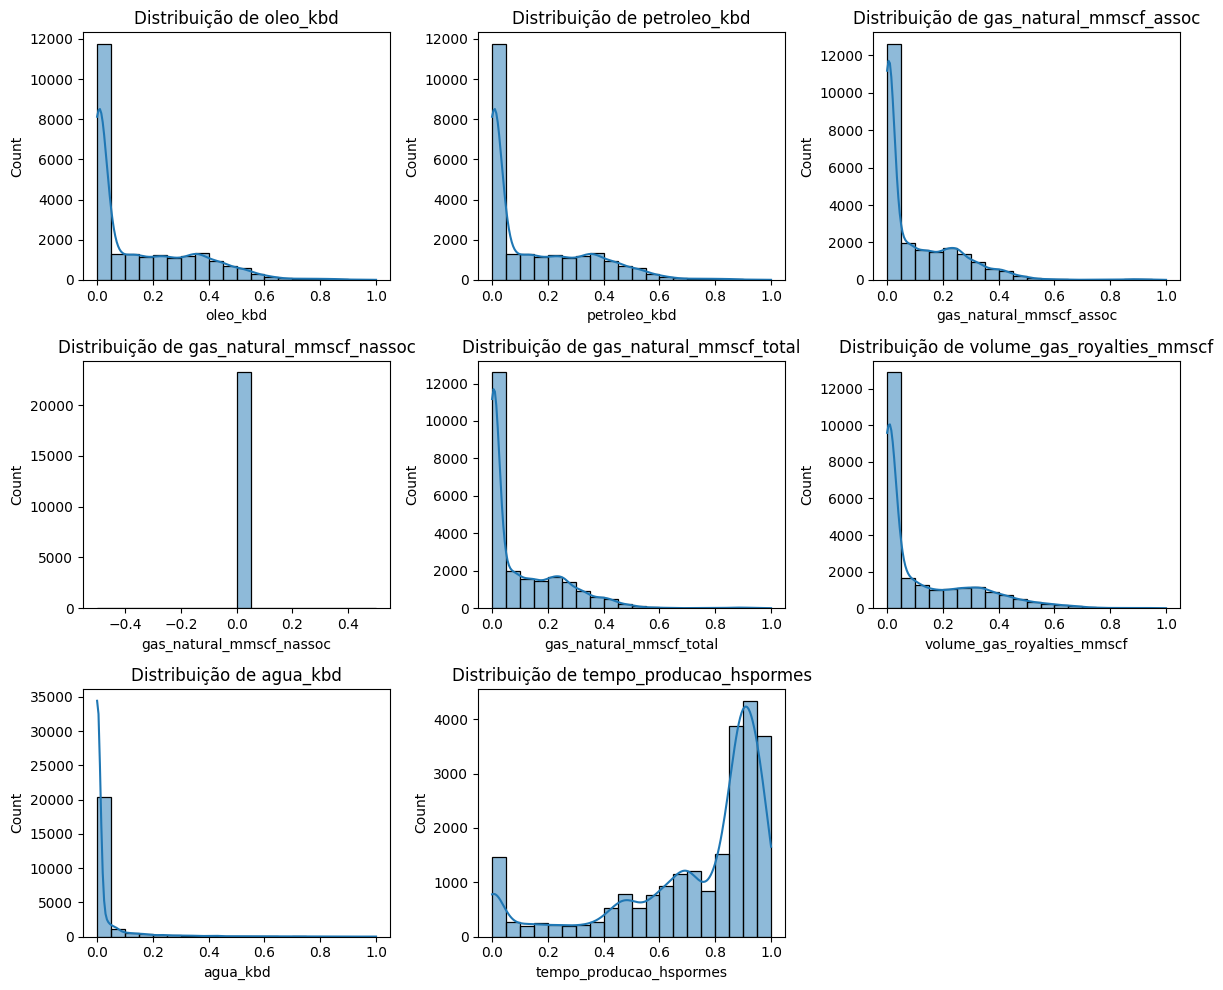

In [ ]:
plt.figure(figsize=(12, 10))
for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_production_normal[coluna], bins=20, kde=True)
    plt.title(f'Distribuição de {coluna}')
plt.tight_layout()
plt.show()

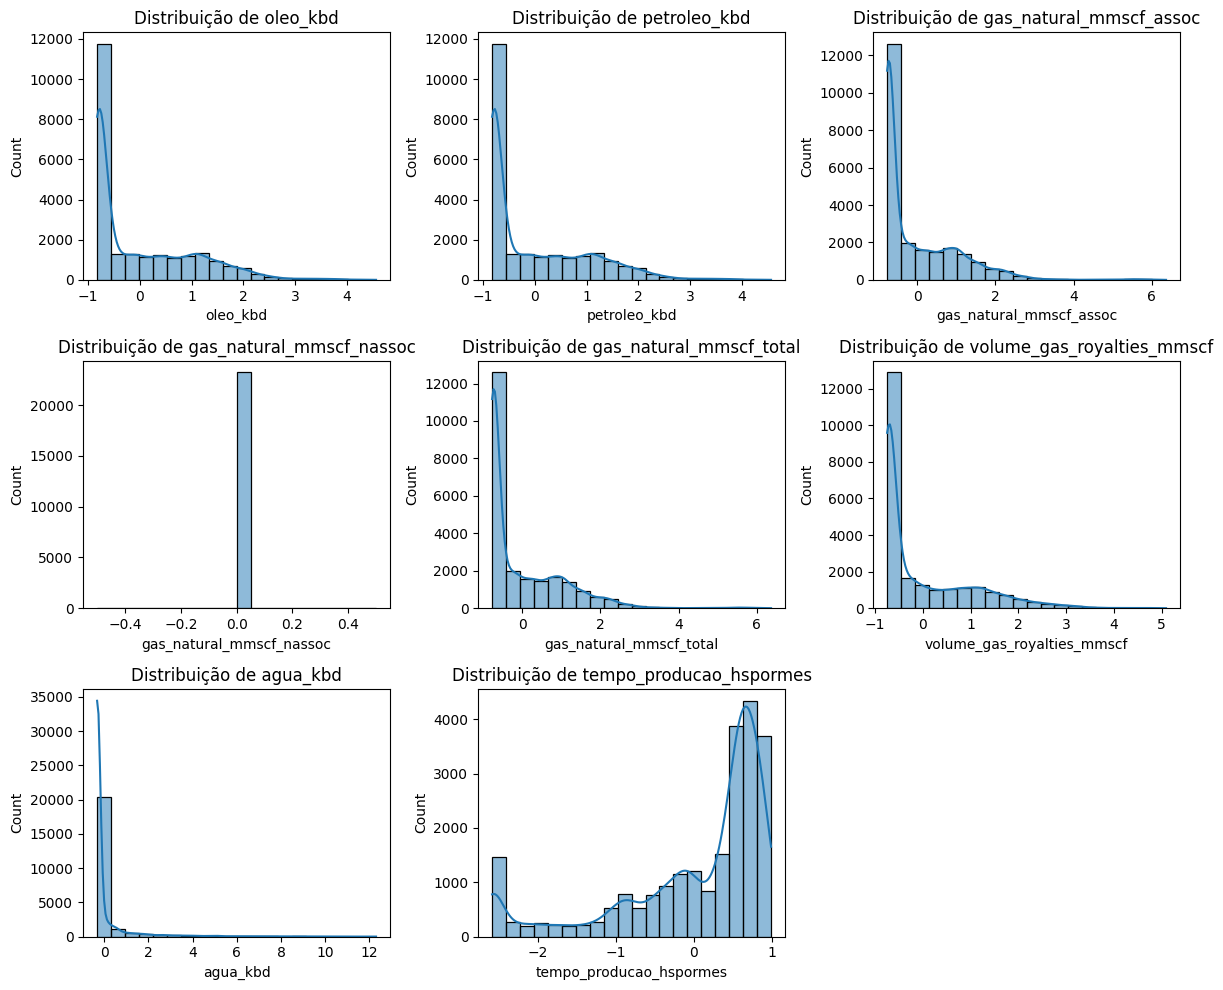

In [ ]:
plt.figure(figsize=(12, 10))
for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_production_padrao[coluna], bins=20, kde=True)
    plt.title(f'Distribuição de {coluna}')
plt.tight_layout()
plt.show()

## Conclusão

Este projeto apresentou um Mínimo Produto Viável (MVP) desenvolvido no âmbito da Pós-Graduação em Ciência de Dados e Analytics da PUC-Rio, focado na análise da produção de petróleo e gás no pré-sal brasileiro a partir de dados abertos da ANP. Através de um processo de exploração, pré-processamento e visualizações, conseguimos identificar tendências e dinâmicas produtivas significativas no período de 2020 a 2024.

O estudo destacou a resiliência da indústria, com um crescimento consistente na produção, mesmo em face de desafios globais, como a pandemia de COVID-19. Análises iniciais revelaram padrões de produtividade, a presença de outliers e a necessidade de um gerenciamento mais eficiente dos recursos. As colunas de dados críticas demonstraram uma qualidade satisfatória, permitindo uma base sólida para futuras análises, incluindo a aplicação de técnicas de machine learning.

Adicionalmente, as visualizações temporais sugerem uma estabilização recente na produção, enfatizando a importância de monitorar as condições de mercado e as influências externas. Este trabalho não só fornece uma compreensão abrangente da indústria de petróleo e gás no Brasil, como também estabelece um alicerce para análises preditivas e inovações no uso de ciência de dados, contribuindo para decisões mais informadas e estratégicas no setor.